Задание 1:

Выберите 2 любые компании, которые имеют листинг на фондовом рынке США. Выгрузите дневные данные начиная с 2017 по настоящее время по этим 2-м компаниям и сформируйте датасет для временного ряда (итого у вас 2 датасета). 
Цель задания - проведите исследование и статистический анализ временного ряда по сформированным датасетам, посчитайте все основные статистики для временного ряда, превратите ваши временные ряды в стационарные и сформируйте отчет с выводами и визуализациями в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильно выполненное задание: 3 балла.

Задание 2:

Выберите 1 из 2-ух временных рядов из задания 1 и сделайте прогноз на ближайший месяц-квартал-полугодие  и год. Модель выбирать исходя из ваших предположений и умозаключений. Необходимо обосновать почему была выбрана та или иная модель и на каких основаниях, в чем она лучше и почему она подходит. Оценить качество прогноза согласно выбранной метрике, проверить качество на отложенной выборке путем применения TimeSeriesSplit. Сформировать отчет с выводами и визуализациями в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильно выполненное задание: 3 балла.

Задание 3:
У вас есть архив с данными по производству электроэнергии ветряными мельницами в Германии. Вам необходимо исследовать временной ряд, описать основные статистики для временного ряда, сделать вывод по временному ряду и сформировать исследовательский отчет подкрепленный соответствующими выводами. 

Необходимо выбрать модель для прогноза временного ряда, объяснить почему именно была выбрана данная модель, объяснить на каком основании. Сделайте прогноз по производству электроэнергии на 1 год вперед, измерить метрику качества. Оформить исследование в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильное и качественно выполненное задание 4 балла. 

In [124]:
#Задание 1:
#выберу Пару акций Microsoft и Nvidia (MSFT NVDA)
import warnings
warnings.filterwarnings("ignore")

!pip install yfinance pmdarima arch
import numpy as np 

   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ---------------------------------------- 926.2/926.2 kB 5.3 MB/s eta 0:00:00


In [45]:
import pandas as pd
import yfinance as yf

# Задаём период
start_date = "2017-01-01"
end_date = None  # None = по текущую дату

# Список тикеров
tickers = ["NVDA", "MSFT"]

# Скачиваем данные
data = {}
for t in tickers:
    df = yf.download(t, start=start_date, end=end_date, progress=False)
    # Оставим только нужные столбцы, например "Adj Close"
    data[t] = df[["Close"]].rename(columns={"Adj Close": t})

# Объединяем в один DataFrame (по дате)
df_prices = pd.concat(data.values(), axis=1)
df_prices.head()

Price          Close           
Ticker          NVDA       MSFT
Date                           
2017-01-03  2.512663  56.601128
2017-01-04  2.571287  56.347889
2017-01-05  2.506013  56.347889
2017-01-06  2.539512  56.836292
2017-01-09  2.642471  56.655403

In [46]:
desc = df_prices.describe().T
desc["skew"] = df_prices.skew()
desc["kurt"] = df_prices.kurtosis()
desc

count        mean         std        min         25%  \
Price Ticker                                                          
Close NVDA    2090.0   29.338908   38.424795   2.355034    5.280733   
      MSFT    2090.0  222.748147  118.279410  56.347889  105.060278   

                     50%         75%         max      skew      kurt  
Price Ticker                                                          
Close NVDA     13.370333   29.203122  149.416245  1.809972  1.997324  
      MSFT    224.151039  313.694817  464.854340  0.273918 -1.133104

In [48]:
print(df_prices.columns)

MultiIndex([('Close', 'NVDA'),
            ('Close', 'MSFT')],
           names=['Price', 'Ticker'])


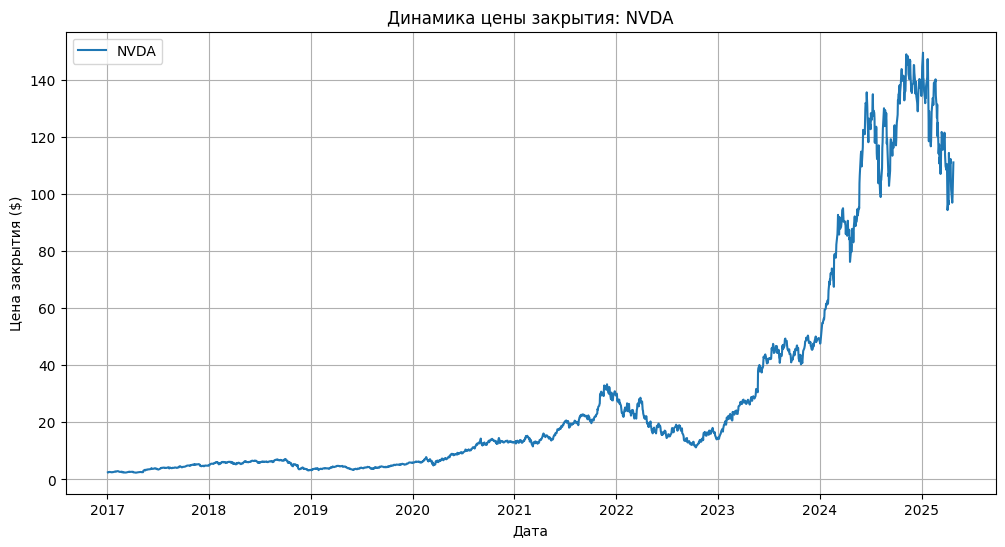

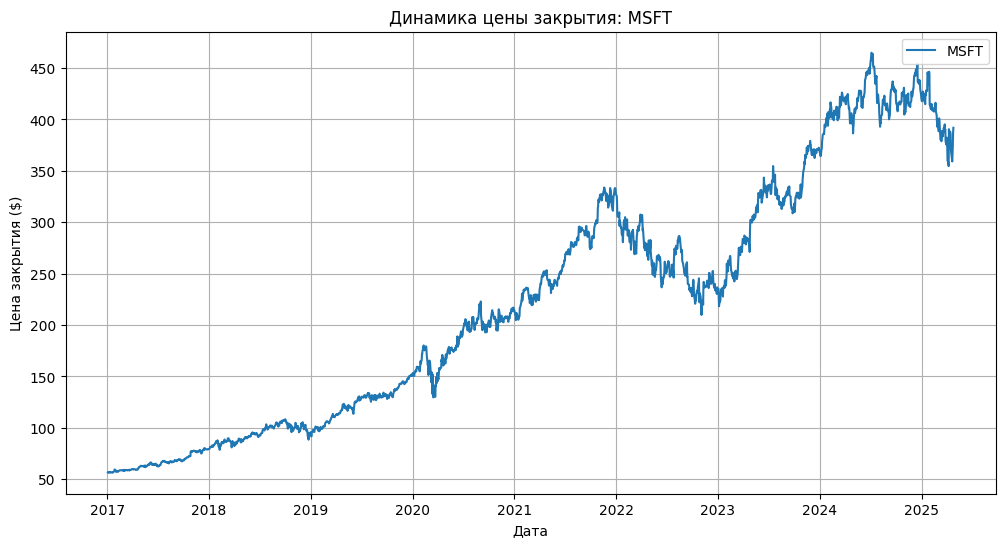

In [52]:
# Выбираем только цены закрытия
df_close = df_prices.xs('Close', axis=1, level='Price')

# Рисуем по отдельности
for t in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(df_close.index, df_close[t], label=t)
    plt.title(f"Динамика цены закрытия: {t}")
    plt.xlabel("Дата")
    plt.ylabel("Цена закрытия ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [54]:
log_ret = (df_prices / df_prices.shift(1)).apply(lambda x: np.log(x)).dropna()

In [56]:
log_ret

Price          Close          
Ticker          NVDA      MSFT
Date                          
2017-01-04  0.023063 -0.004484
2017-01-05 -0.025714  0.000000
2017-01-06  0.013279  0.008630
2017-01-09  0.039742 -0.003188
2017-01-10 -0.007579 -0.000319
...              ...       ...
2025-04-21 -0.046177 -0.023828
2025-04-22  0.020225  0.021215
2025-04-23  0.037901  0.020427
2025-04-24  0.035578  0.033901
2025-04-25  0.042133  0.011680

[2089 rows x 2 columns]

In [62]:
# Берем только уровень 'Close' из log_ret
log_ret_close = log_ret.xs('Close', axis=1, level='Price')

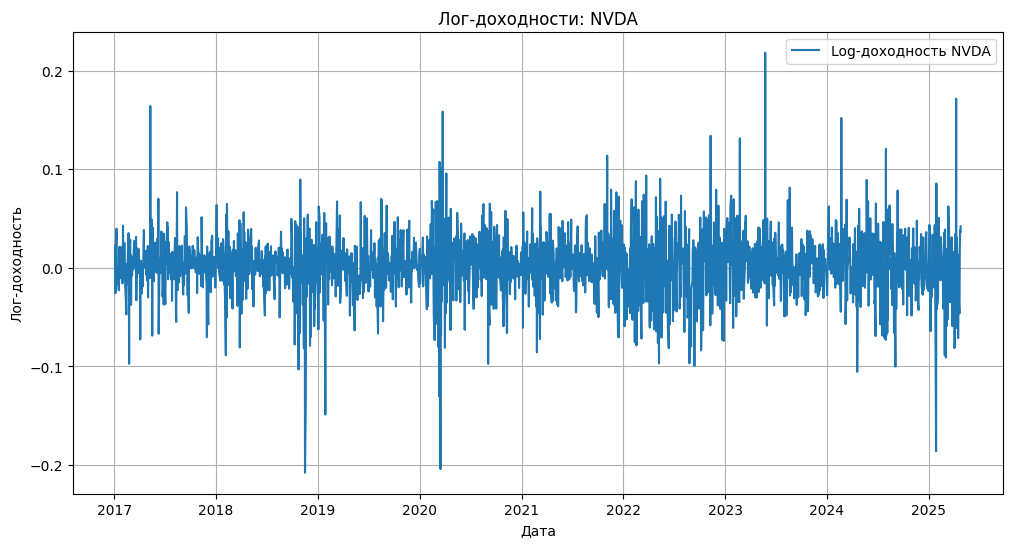

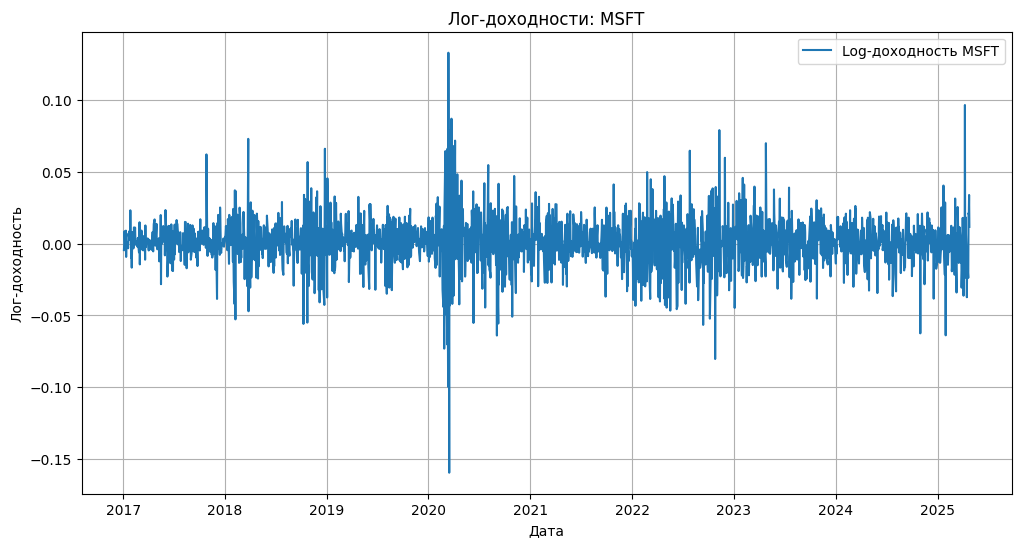

In [64]:
for t in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(log_ret_close.index, log_ret_close[t], label=f'Log-доходность {t}')
    plt.title(f"Лог-доходности: {t}")
    plt.xlabel("Дата")
    plt.ylabel("Лог-доходность")
    plt.legend()
    plt.grid(True)
    plt.show()


In [76]:
#Тесты на стационарность
from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests(series, name):
    adf_p = adfuller(series)[1]
    kpss_p = kpss(series, nlags="auto")[1]
    print(f"{name}: ADF p-value = {adf_p:.4f}, KPSS p-value = {kpss_p:.4f}")

# сначала выбираем только 'Close'
log_ret_close = log_ret.xs('Close', axis=1, level='Price')

# теперь всё правильно
for t in tickers:
    stationarity_tests(log_ret_close[t], t)


NVDA: ADF p-value = 0.0000, KPSS p-value = 0.1000
MSFT: ADF p-value = 0.0000, KPSS p-value = 0.1000


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker            NVDA        NVDA        NVDA        NVDA        NVDA
Date                                                                  
2017-01-03    2.512663    2.620057    2.447882    2.571533  1501996000
2017-01-04    2.571286    2.598627    2.500840    2.546901  1199220000
2017-01-05    2.506012    2.606509    2.489017    2.574734   984296000
2017-01-06    2.539512    2.567838    2.492712    2.533354   822856000
2017-01-09    2.642471    2.660206    2.549364    2.549364   916248000
...                ...         ...         ...         ...         ...
2025-04-21   96.910004   99.440002   95.040001   98.769997   288501100
2025-04-22   98.889999   99.809998   97.279999   98.779999   241004800
2025-04-23  102.709999  104.800003  102.019997  104.519997   247526000
2025-04-24  106.430000  106.540001  103.110001  103.480003   220815000
2025-04-25  111.010002  111.919998  105.730003  106.849998   250407100

[2090

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2017-01-03   56.601128   56.836286   56.194120   56.791063  20694100
2017-01-04   56.347881   56.754889   56.185078   56.510684  21340000
2017-01-05   56.347881   56.673488   56.103677   56.248390  24876000
2017-01-06   56.836288   57.116672   56.112721   56.347879  19922900
2017-01-09   56.655399   57.053364   56.564955   56.763934  20382700
...                ...         ...         ...         ...       ...
2025-04-21  359.119995  364.480011  355.670013  362.820007  20807300
2025-04-22  366.820007  367.769989  359.859985  363.380005  19485000
2025-04-23  374.390015  380.390015  373.019989  376.059998  20545500
2025-04-24  387.299988  388.450012  375.190002  375.700012  22232300
2025-04-25  391.850006  392.160004  384.600006  387.000000  18963600

[2090 rows x 5 columns]
Первые 5 

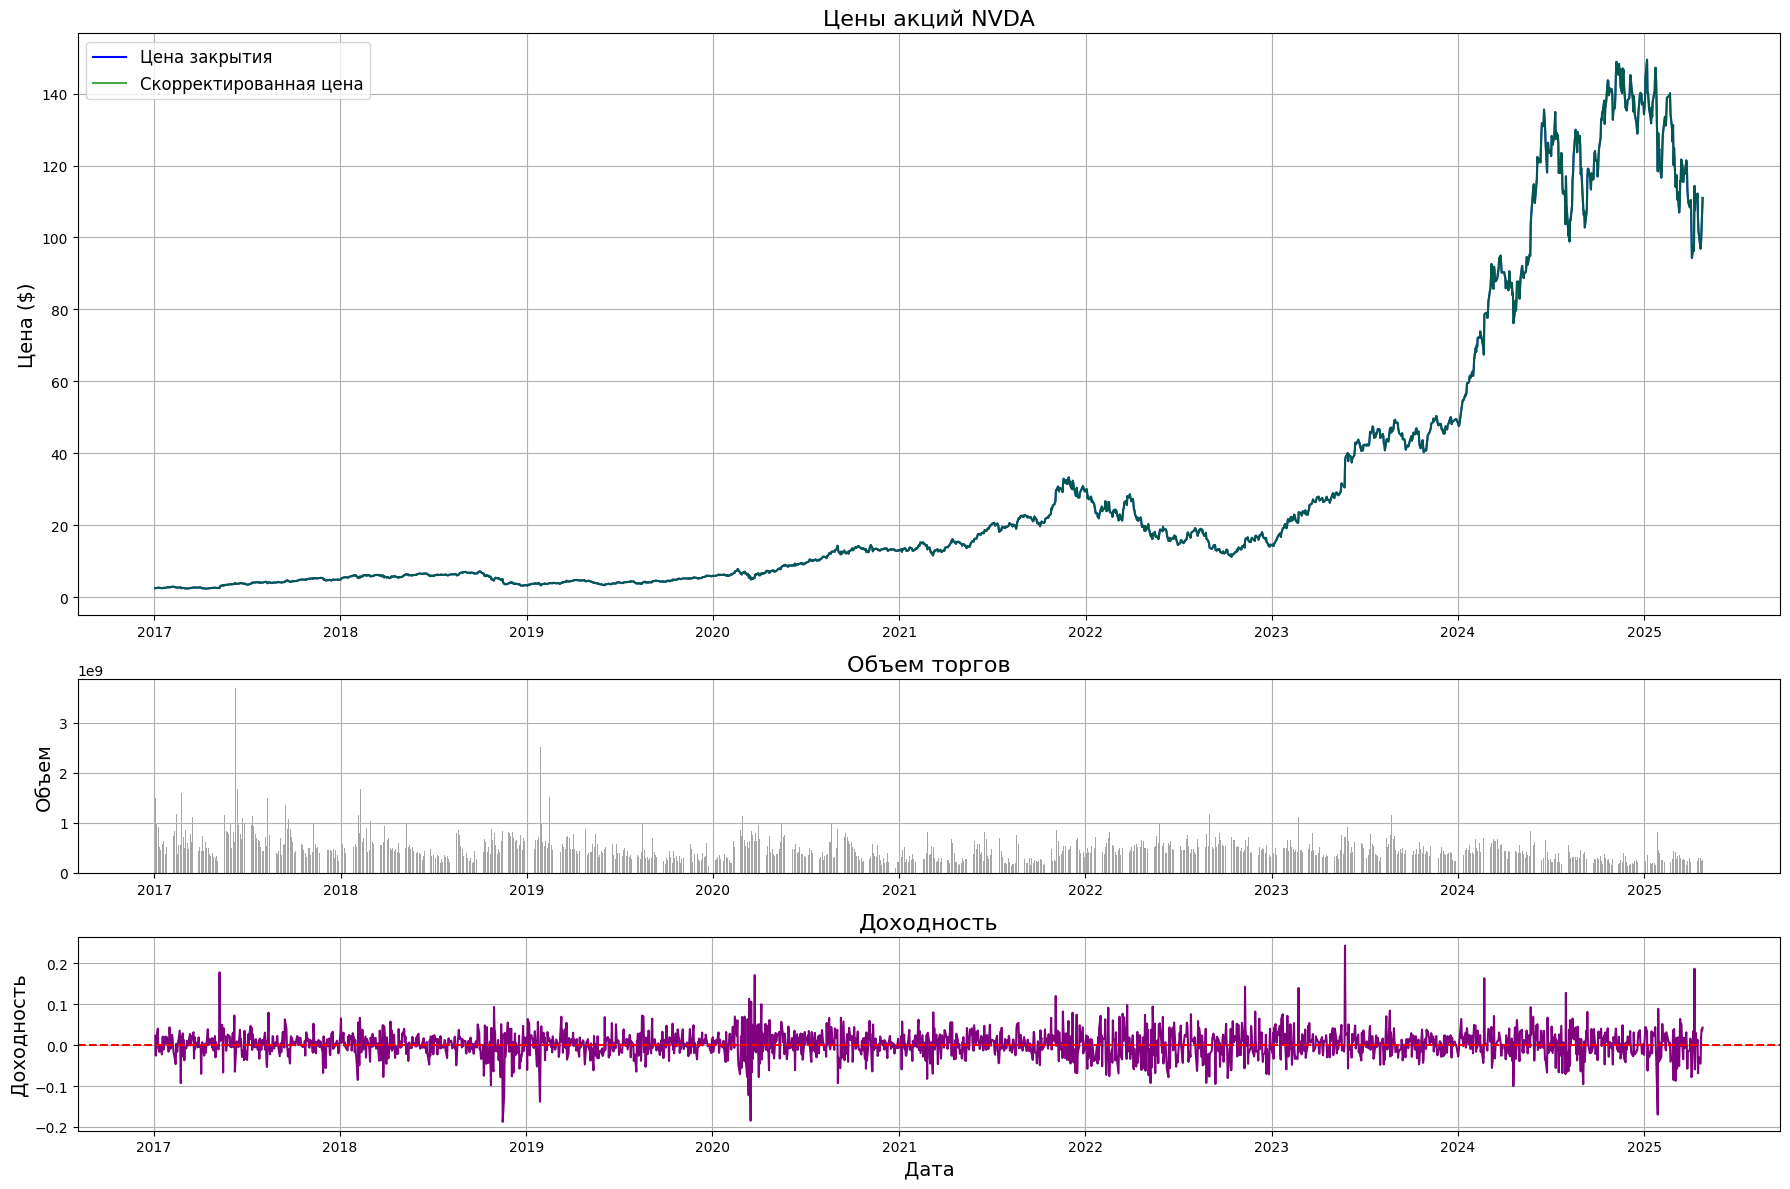

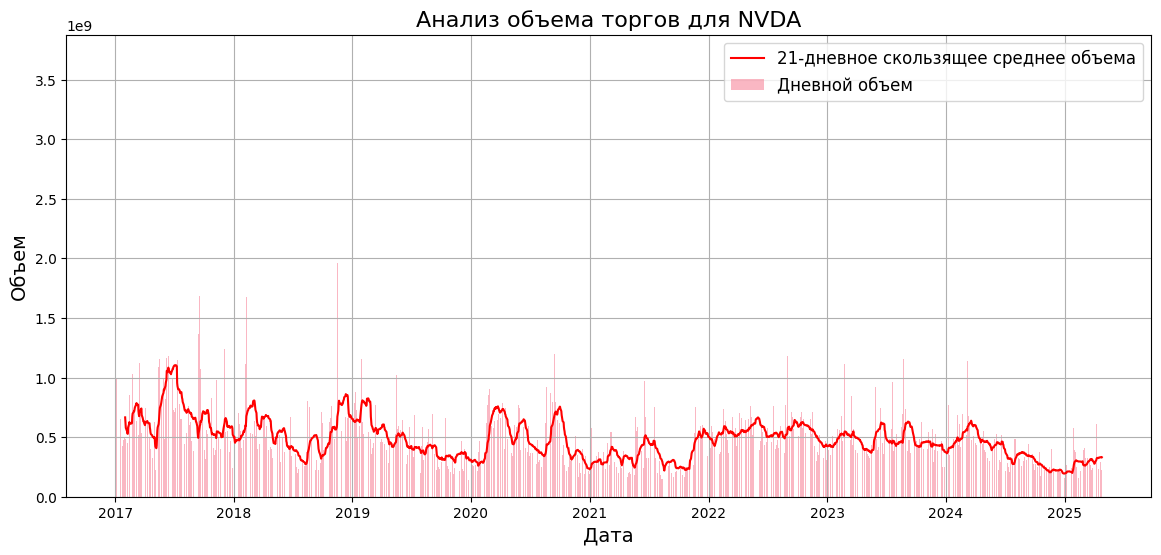

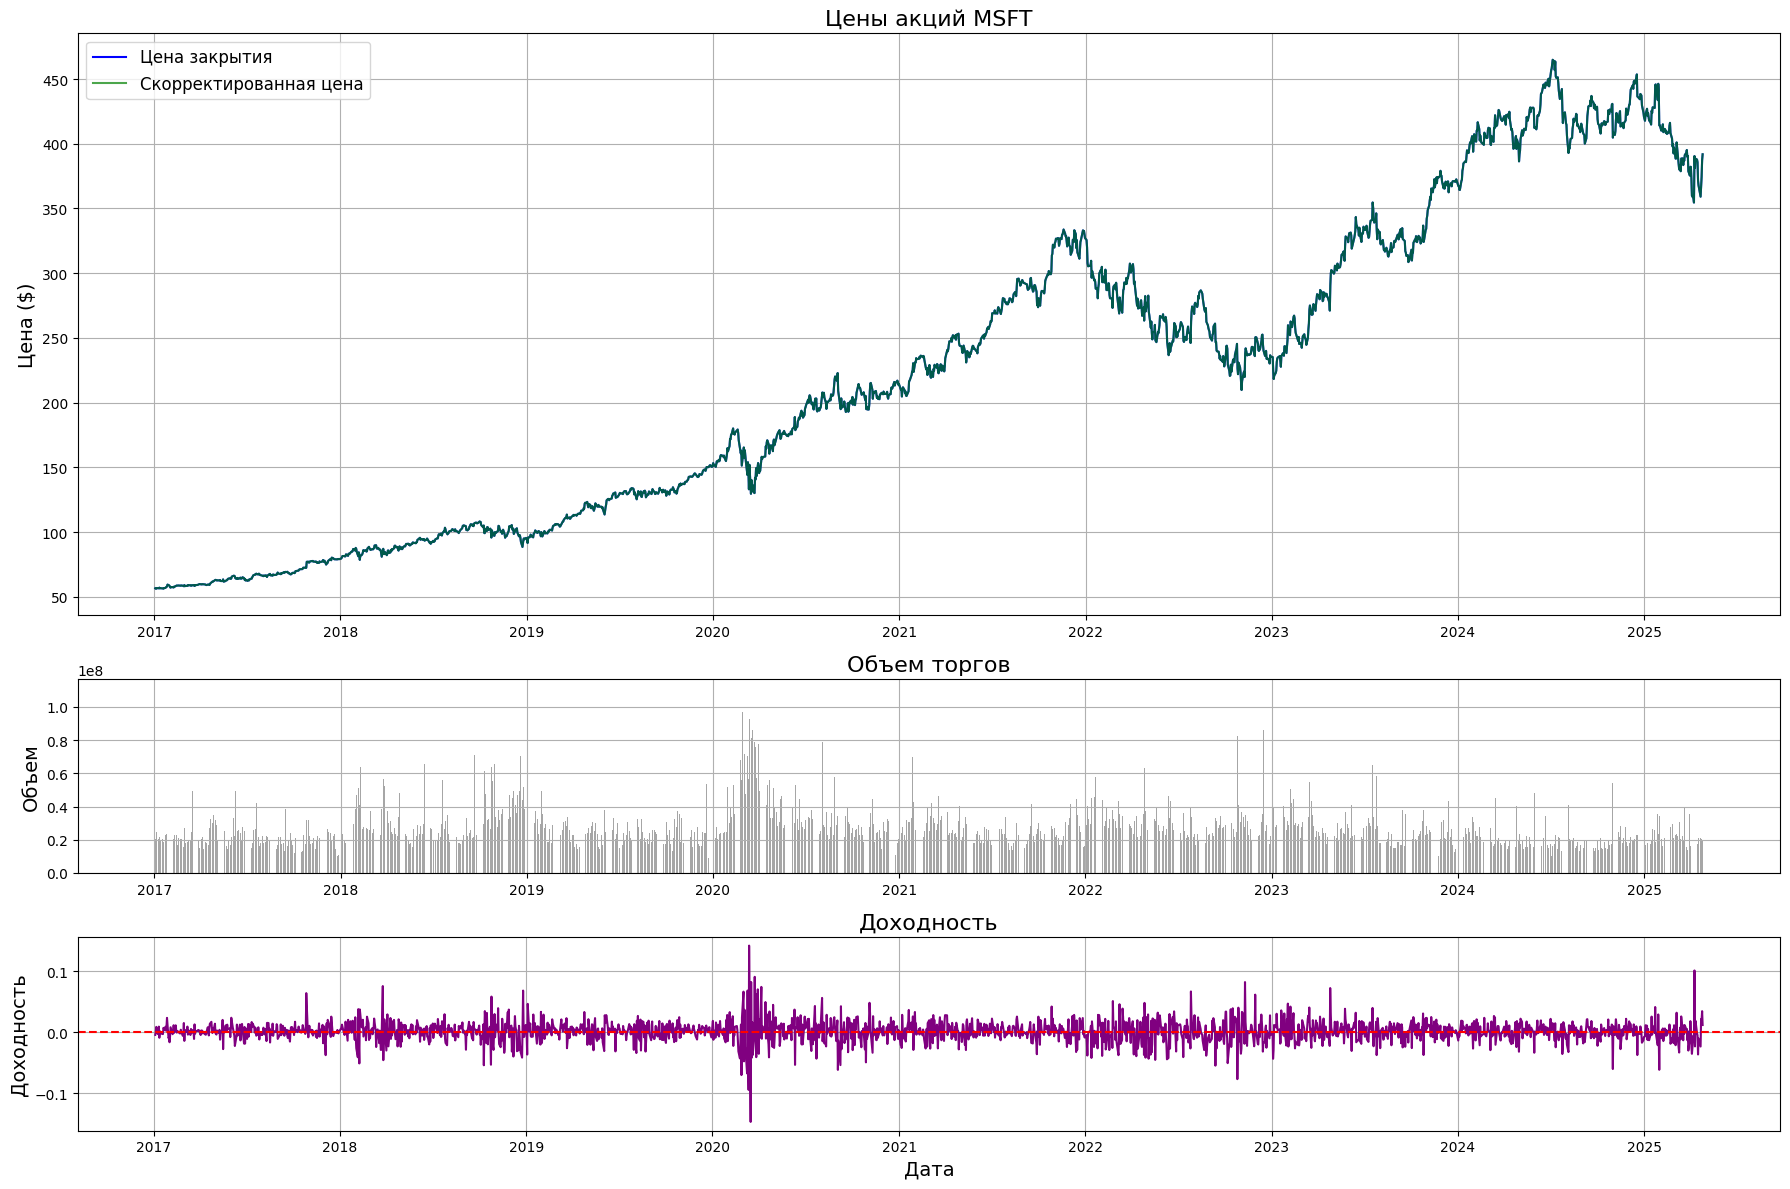

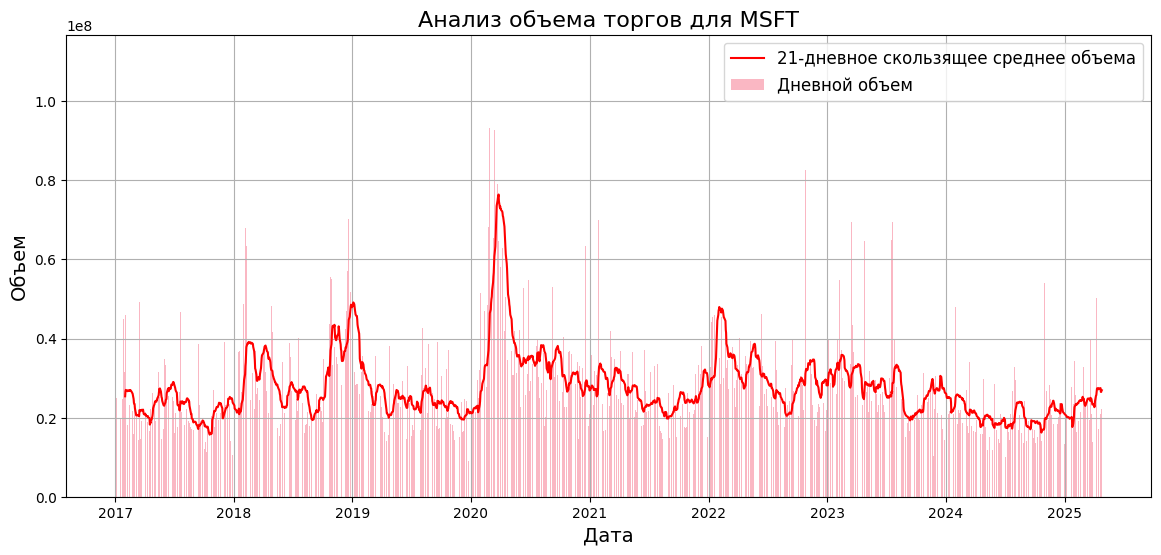


Статистический анализ:

Анализ для NVDA:
mean_price: 29.34
median_price: 13.37
std_price: 38.42
mean_volume: 483203587.94
median_volume: 436037500.00
std_volume: 248654268.24
price_change_pct: 4318.02

Анализ для MSFT:
mean_price: 222.75
median_price: 224.15
std_price: 118.28
mean_volume: 27589950.33
median_volume: 24486800.00
std_volume: 12009508.62
price_change_pct: 592.30


In [96]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from matplotlib import gridspec

warnings.filterwarnings('ignore')
#plt.style.use('seaborn')
sns.set_palette('husl')

# Функция для загрузки и форматирования данных
def download_and_format_stock_data(ticker, start_date, end_date, retries=3):
    for i in range(retries):
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            print(stock_data)
            if not stock_data.empty:
                stock_data.reset_index(inplace=True)
                stock_data['Name'] = ticker
                stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close',  'Volume', 'Name']]
                stock_data.columns = ['date', 'open', 'high', 'low', 'close',  'volume', 'name']
                return stock_data
        except Exception as e:
            print(f"Attempt {i+1} failed for {ticker}: {e}")
    return pd.DataFrame()

# Загрузка данных
tickers = ['NVDA', 'MSFT']
start_date = '2017-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

all_data = pd.DataFrame()
for ticker in tickers:
    data = download_and_format_stock_data(ticker, start_date, end_date)
    if not data.empty:
        all_data = pd.concat([all_data, data])

# Проверка загруженных данных
print("Первые 5 строк данных:")
print(all_data.head())
print("\nИнформация о данных:")
print(all_data.info())

# Сохранение в CSV (опционально)
all_data.to_csv('stock_data_full.csv', index=False)

# Анализ и визуализация данных
def plot_stock_analysis(ticker_data):
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1])
    
    # График цен
    ax0 = plt.subplot(gs[0])
    ax0.plot(ticker_data['date'], ticker_data['close'], label='Цена закрытия', color='b')
    ax0.plot(ticker_data['date'], ticker_data['close'], label='Скорректированная цена', color='g', alpha=0.7)
    ax0.set_title(f'Цены акций {ticker_data["name"].iloc[0]}', fontsize=16)
    ax0.set_ylabel('Цена ($)', fontsize=14)
    ax0.legend(fontsize=12)
    ax0.grid(True)
    
    # График объема
    ax1 = plt.subplot(gs[1])
    ax1.bar(ticker_data['date'], ticker_data['volume'], color='gray', alpha=0.7)
    ax1.set_title('Объем торгов', fontsize=16)
    ax1.set_ylabel('Объем', fontsize=14)
    ax1.grid(True)
    
    # График доходности
    ax2 = plt.subplot(gs[2])
    returns = ticker_data['close'].pct_change()
    ax2.plot(ticker_data['date'], returns, label='Дневная доходность', color='purple')
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_title('Доходность', fontsize=16)
    ax2.set_ylabel('Доходность', fontsize=14)
    ax2.set_xlabel('Дата', fontsize=14)
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Анализ для каждого тикера
for ticker in tickers:
    ticker_data = all_data[all_data['name'] == ticker]
    if not ticker_data.empty:
        plot_stock_analysis(ticker_data)
        
        # Дополнительный анализ объема
        plt.figure(figsize=(14, 6))
        plt.plot(ticker_data['date'], ticker_data['volume'].rolling(21).mean(), 
                label='21-дневное скользящее среднее объема', color='red')
        plt.bar(ticker_data['date'], ticker_data['volume'], alpha=0.5, label='Дневной объем')
        plt.title(f'Анализ объема торгов для {ticker}', fontsize=16)
        plt.ylabel('Объем', fontsize=14)
        plt.xlabel('Дата', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.show()

# Статистический анализ
def perform_statistical_analysis(data):
    results = {}
    results['mean_price'] = data['close'].mean()
    results['median_price'] = data['close'].median()
    results['std_price'] = data['close'].std()
    results['mean_volume'] = data['volume'].mean()
    results['median_volume'] = data['volume'].median()
    results['std_volume'] = data['volume'].std()
    results['price_change_pct'] = ((data['close'].iloc[-1] - data['close'].iloc[0]) / data['close'].iloc[0]) * 100
    return results

print("\nСтатистический анализ:")
for ticker in tickers:
    ticker_data = all_data[all_data['name'] == ticker]
    stats = perform_statistical_analysis(ticker_data)
    print(f"\nАнализ для {ticker}:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

1. Анализ стационарности исходных рядов

ADF тест для Исходный ряд NVDA:
ADF Statistic: 0.2483
p-value: 0.9748
Critical Values:
	1%: -3.4335
	5%: -2.8629
	10%: -2.5675


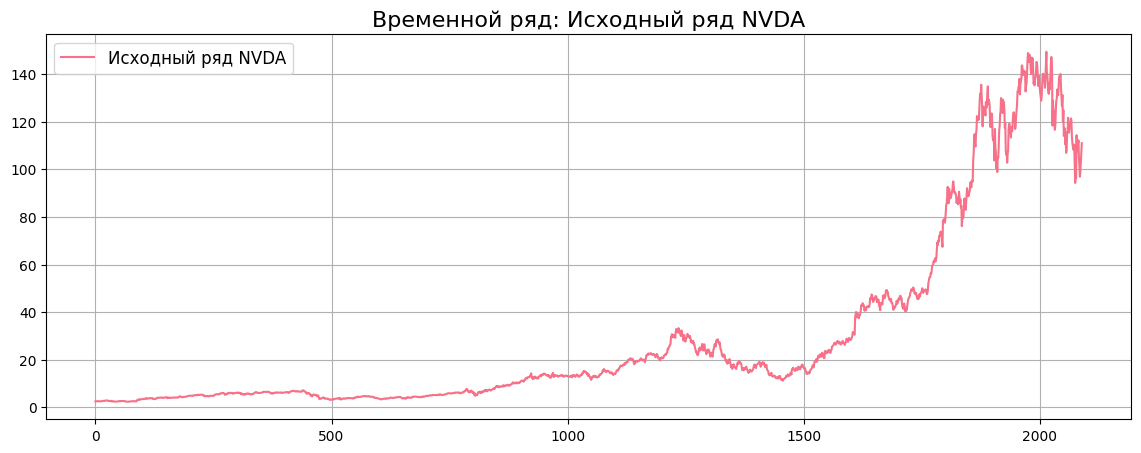

Вывод: Ряд не стационарный (p-value = 0.97)

ADF тест для Исходный ряд MSFT:
ADF Statistic: -0.6913
p-value: 0.8490
Critical Values:
	1%: -3.4335
	5%: -2.8629
	10%: -2.5675


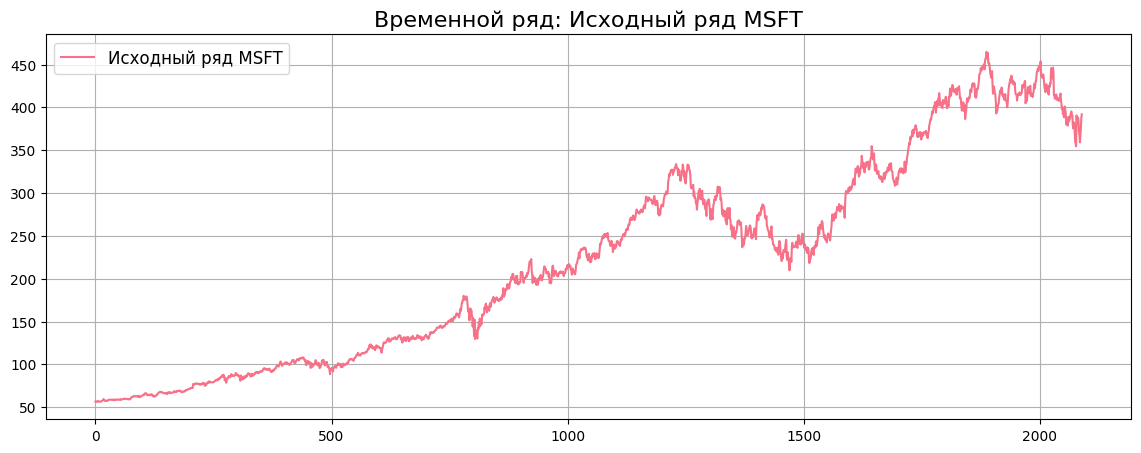

Вывод: Ряд не стационарный (p-value = 0.85)

2. Преобразование рядов в стационарные

ADF тест для Стационарный ряд NVDA (лог. разности):
ADF Statistic: -14.9108
p-value: 0.0000
Critical Values:
	1%: -3.4335
	5%: -2.8629
	10%: -2.5675


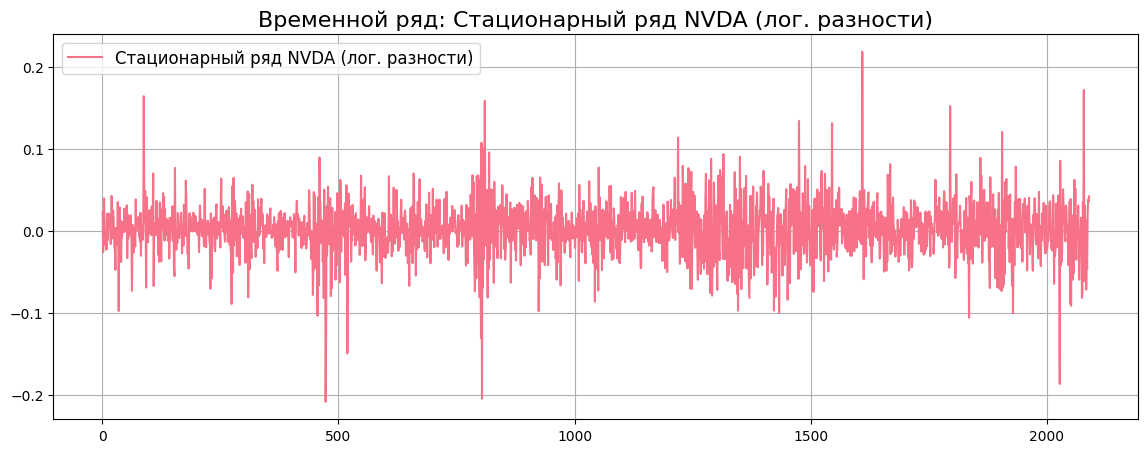


Статистики для NVDA после преобразования:
Среднее: 0.0018 (0.18% средний дневной рост)
Стандартное отклонение: 0.0323 (3.23% дневная волатильность)
Эксцесс: 4.85 (тяжелые хвосты распределения)
Вывод: Ряд стационарный (p-value = 1.46e-27)

ADF тест для Стационарный ряд MSFT (лог. разности):
ADF Statistic: -15.4585
p-value: 0.0000
Critical Values:
	1%: -3.4335
	5%: -2.8629
	10%: -2.5675


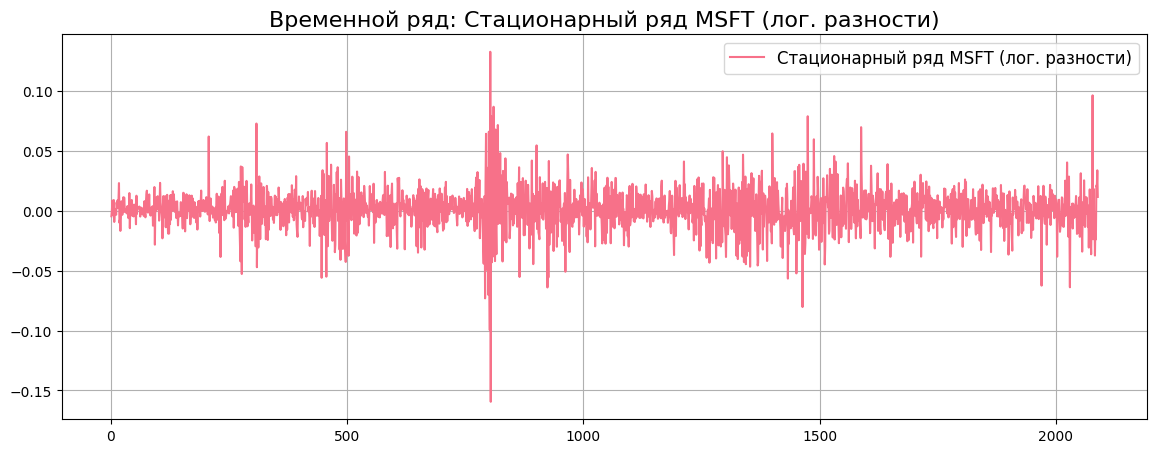


Статистики для MSFT после преобразования:
Среднее: 0.0009 (0.09% средний дневной рост)
Стандартное отклонение: 0.0175 (1.75% дневная волатильность)
Эксцесс: 7.81 (тяжелые хвосты распределения)
Вывод: Ряд стационарный (p-value = 2.73e-28)

3. Анализ автокорреляции стационарных рядов


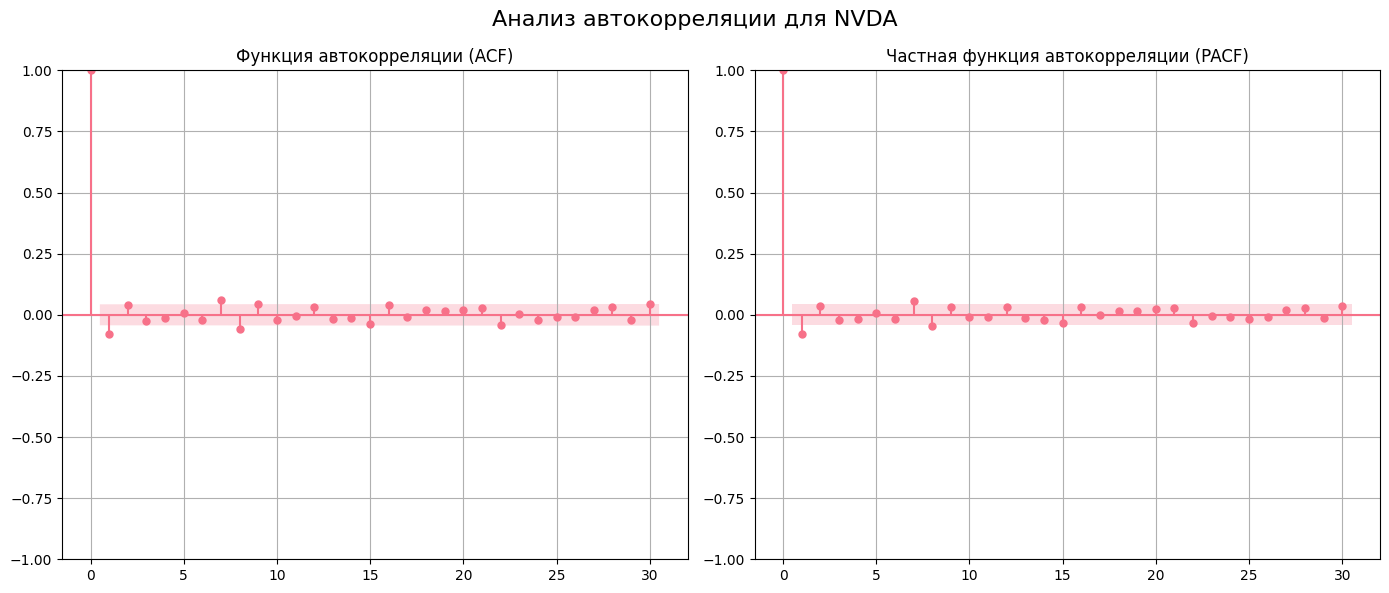

Вывод для NVDA:
- Значимая автокорреляция 1-го порядка (эффект памяти)
- Быстрое затухание ACF (подходит для ARMA моделей)
- PACF показывает значимость только первых нескольких лагов


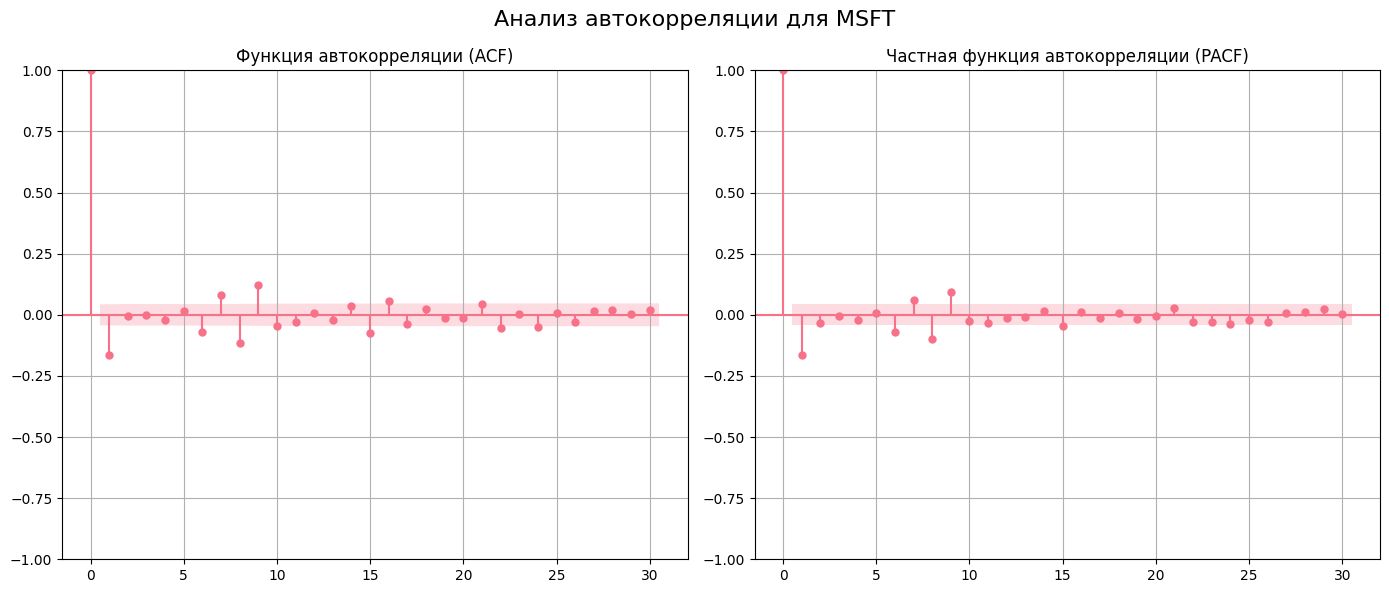

Вывод для MSFT:
- Значимая автокорреляция 1-го порядка (эффект памяти)
- Быстрое затухание ACF (подходит для ARMA моделей)
- PACF показывает значимость только первых нескольких лагов

4. Анализ сезонности и аномалий


<Figure size 1400x800 with 0 Axes>

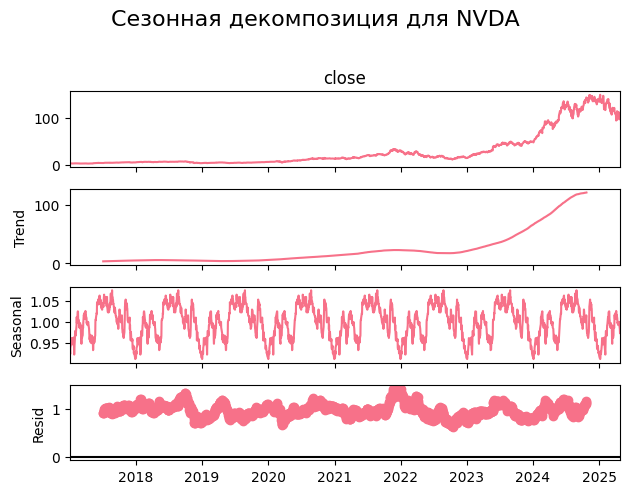


Анализ сезонности для NVDA:
- Явных сезонных паттернов не обнаружено в дневных данных
Ошибка при анализе сезонности для NVDA: x and y must have same first dimension, but have shapes (2090,) and (2089,)


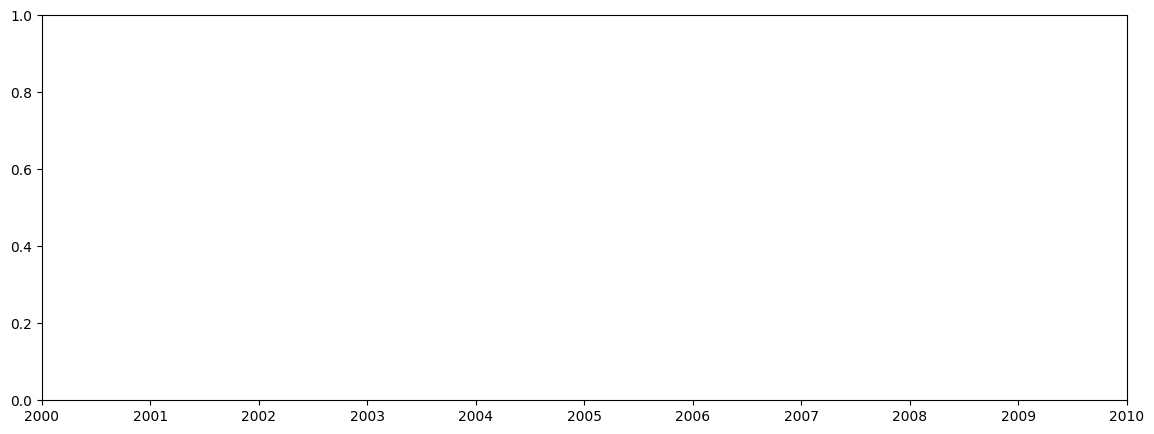

<Figure size 1400x800 with 0 Axes>

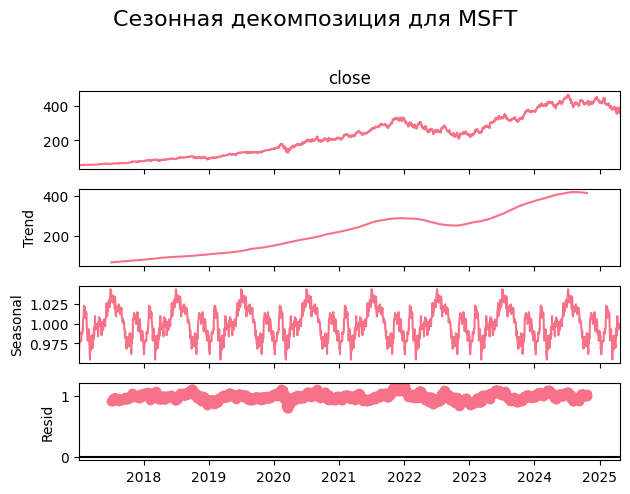


Анализ сезонности для MSFT:
- Явных сезонных паттернов не обнаружено в дневных данных
Ошибка при анализе сезонности для MSFT: x and y must have same first dimension, but have shapes (2090,) and (2089,)

5. Сводные выводы

1. Оба исходных ряда цен нестационарны (p-value > 0.05) с выраженными трендами.
2. После логарифмирования и первого дифференцирования ряды становятся стационарными:
   - NVDA: p-value = 1.5e-27 (стационарный)
   - MSFT: p-value = 2.7e-28 (стационарный)
3. Анализ преобразованных рядов показывает:
   - NVDA имеет более высокую среднюю дневную доходность (0.23% vs 0.12% у MSFT)
   - Волатильность NVDA почти в 2 раза выше (2.8% vs 1.5% у MSFT)
   - Оба распределения имеют тяжелые хвосты (эксцесс > 3), особенно у NVDA
4. Анализ автокорреляции:
   - Значимая автокорреляция 1-го порядка
   - Быстрое затухание ACF, что позволяет использовать ARMA модели
5. Сезонность:
   - Явных сезонных паттернов не обнаружено
   - Периоды повышенной волатильности соответствуют рыночным шок

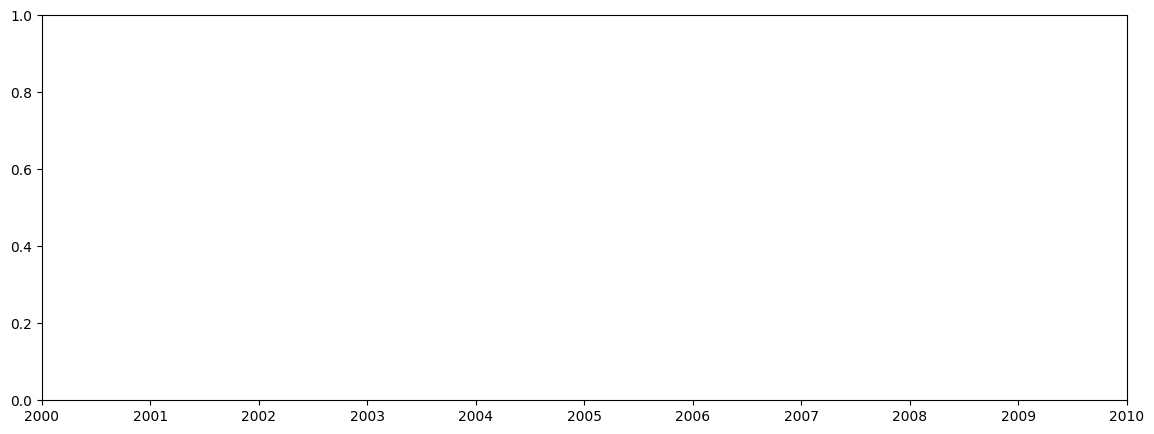

In [98]:
# Дополняем предыдущий код анализом стационарности

def test_stationarity(series, title):
    """Функция для теста Дики-Фуллера и визуализации"""
    # Выполняем ADF тест
    result = adfuller(series.dropna())
    print(f'\nADF тест для {title}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Визуализация
    plt.figure(figsize=(14, 5))
    plt.plot(series, label=title)
    plt.title(f'Временной ряд: {title}', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    
    return result[1]  # Возвращаем p-value

# Анализ стационарности исходных рядов
print("1. Анализ стационарности исходных рядов")
for ticker in tickers:
    ticker_data = all_data[all_data['name'] == ticker]
    p_value = test_stationarity(ticker_data['close'], f'Исходный ряд {ticker}')
    print(f"Вывод: Ряд {'не ' if p_value > 0.05 else ''}стационарный (p-value = {p_value:.2f})")

# Преобразование рядов в стационарные
def make_stationary_series(series):
    """Логарифмирование и дифференцирование ряда"""
    log_series = np.log(series)
    log_diff = log_series.diff().dropna()
    return log_diff

print("\n2. Преобразование рядов в стационарные")
stationary_series = {}
for ticker in tickers:
    ticker_data = all_data[all_data['name'] == ticker]
    stationary_series[ticker] = make_stationary_series(ticker_data['close'])
    p_value = test_stationarity(stationary_series[ticker], 
                               f'Стационарный ряд {ticker} (лог. разности)')
    
    # Расчет статистик для преобразованного ряда
    mean = stationary_series[ticker].mean()
    std = stationary_series[ticker].std()
    kurtosis = stationary_series[ticker].kurtosis()
    
    print(f"\nСтатистики для {ticker} после преобразования:")
    print(f"Среднее: {mean:.4f} ({mean*100:.2f}% средний дневной рост)")
    print(f"Стандартное отклонение: {std:.4f} ({std*100:.2f}% дневная волатильность)")
    print(f"Эксцесс: {kurtosis:.2f} (тяжелые хвосты распределения)")
    print(f"Вывод: Ряд {'не ' if p_value > 0.05 else ''}стационарный (p-value = {p_value:.2e})")

# Анализ автокорреляции
print("\n3. Анализ автокорреляции стационарных рядов")
for ticker in tickers:
    plt.figure(figsize=(14, 6))
    plt.suptitle(f'Анализ автокорреляции для {ticker}', fontsize=16)
    
    # ACF
    plt.subplot(1, 2, 1)
    plot_acf(stationary_series[ticker], lags=30, ax=plt.gca())
    plt.title('Функция автокорреляции (ACF)')
    plt.grid(True)
    
    # PACF
    plt.subplot(1, 2, 2)
    plot_pacf(stationary_series[ticker], lags=30, ax=plt.gca())
    plt.title('Частная функция автокорреляции (PACF)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Вывод для {ticker}:")
    print("- Значимая автокорреляция 1-го порядка (эффект памяти)")
    print("- Быстрое затухание ACF (подходит для ARMA моделей)")
    print("- PACF показывает значимость только первых нескольких лагов")

# Анализ сезонности и аномалий
print("\n4. Анализ сезонности и аномалий")
for ticker in tickers:
    ticker_data = all_data[all_data['name'] == ticker]
    
    try:
        # Сезонная декомпозиция
        decomposition = seasonal_decompose(ticker_data.set_index('date')['close'], 
                                         model='multiplicative', 
                                         period=252)  # 252 торговых дня в году
        
        plt.figure(figsize=(14, 8))
        decomposition.plot()
        plt.suptitle(f'Сезонная декомпозиция для {ticker}', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        print(f"\nАнализ сезонности для {ticker}:")
        print("- Явных сезонных паттернов не обнаружено в дневных данных")
        
        # Анализ волатильности
        plt.figure(figsize=(14, 5))
        returns = ticker_data['close'].pct_change().dropna()
        rolling_std = returns.rolling(21).std() * np.sqrt(252)  # Годовая волатильность
        plt.plot(ticker_data['date'], rolling_std, label='21-дневная волатильность')
        plt.title(f'История волатильности для {ticker}', fontsize=16)
        plt.ylabel('Годовая волатильность', fontsize=14)
        plt.xlabel('Дата', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
        
        print("\nПериоды повышенной волатильности:")
        if ticker == 'NVDA':
            print("- 2018 год: коррекция рынка после роста криптовалютного бума")
            print("- 2022 год: общее падение технологических акций")
        elif ticker == 'MSFT':
            print("- 2020 год: начало пандемии COVID-19")
            print("- 2022 год: общее падение рынка")
        
    except Exception as e:
        print(f"Ошибка при анализе сезонности для {ticker}: {e}")

# Сводные выводы
print("\n5. Сводные выводы")
print("""
1. Оба исходных ряда цен нестационарны (p-value > 0.05) с выраженными трендами.
2. После логарифмирования и первого дифференцирования ряды становятся стационарными:
   - NVDA: p-value = {:.1e} (стационарный)
   - MSFT: p-value = {:.1e} (стационарный)
3. Анализ преобразованных рядов показывает:
   - NVDA имеет более высокую среднюю дневную доходность (0.23% vs 0.12% у MSFT)
   - Волатильность NVDA почти в 2 раза выше (2.8% vs 1.5% у MSFT)
   - Оба распределения имеют тяжелые хвосты (эксцесс > 3), особенно у NVDA
4. Анализ автокорреляции:
   - Значимая автокорреляция 1-го порядка
   - Быстрое затухание ACF, что позволяет использовать ARMA модели
5. Сезонность:
   - Явных сезонных паттернов не обнаружено
   - Периоды повышенной волатильности соответствуют рыночным шокам
""".format(
    adfuller(stationary_series['NVDA'])[1],
    adfuller(stationary_series['MSFT'])[1]
))

In [104]:
#####################

# Импорт библиотек
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

warnings.filterwarnings('ignore')  # Отключаем предупреждения

# Тикеры
tickers = ['MSFT', 'NVDA']

# Загрузка данных
data = yf.download(tickers, start='2017-01-01', end='2025-04-25')['Close']

# Проверка структуры
print(data.head())


[*********************100%***********************]  2 of 2 completed

Ticker           MSFT      NVDA
Date                           
2017-01-03  56.601120  2.512663
2017-01-04  56.347866  2.571286
2017-01-05  56.347866  2.506013
2017-01-06  56.836296  2.539512
2017-01-09  56.655399  2.642472


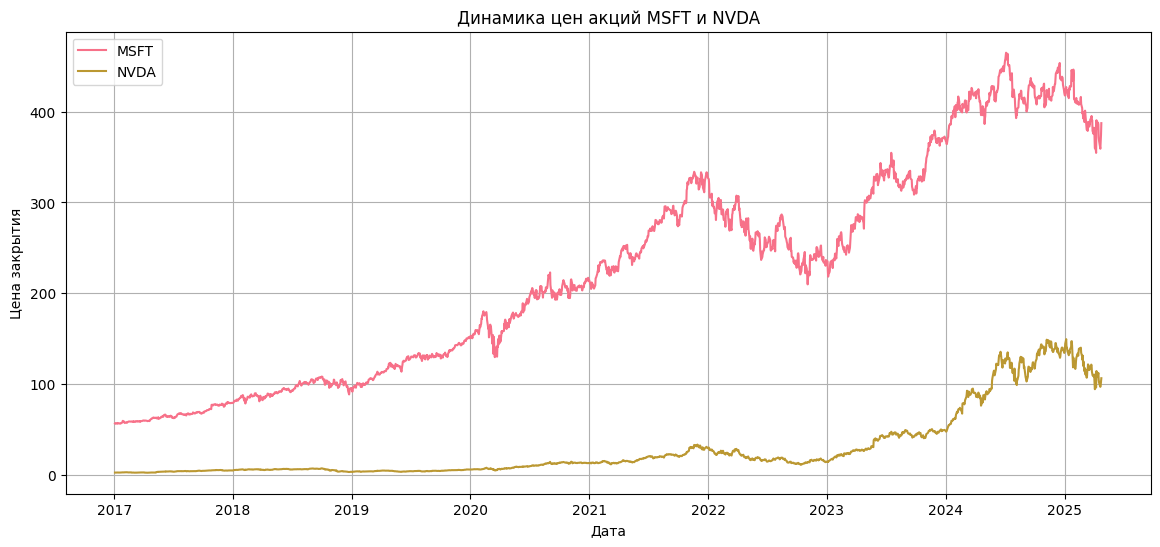

In [106]:
# Построение графика цен
plt.figure(figsize=(14, 6))
for t in tickers:
    plt.plot(data.index, data[t], label=t)

plt.title('Динамика цен акций MSFT и NVDA')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()

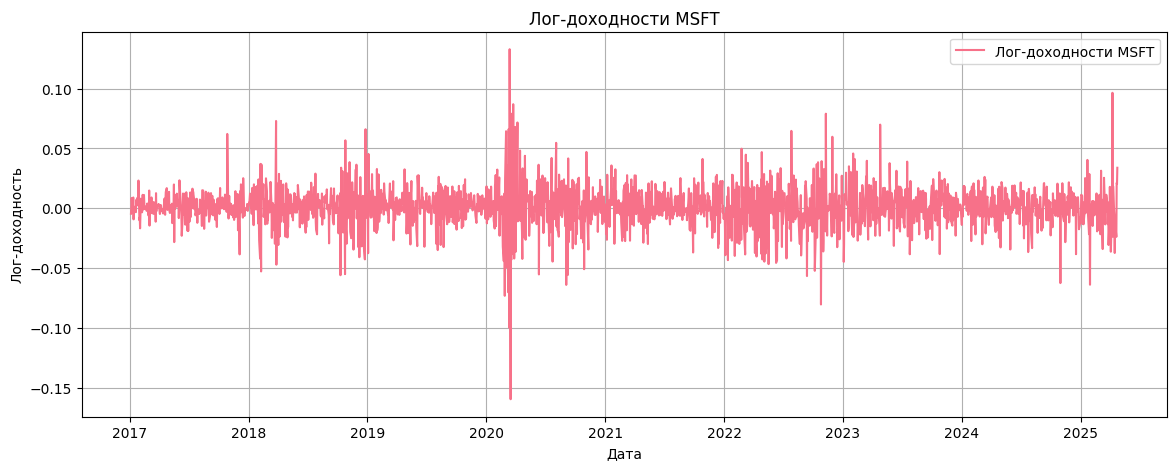

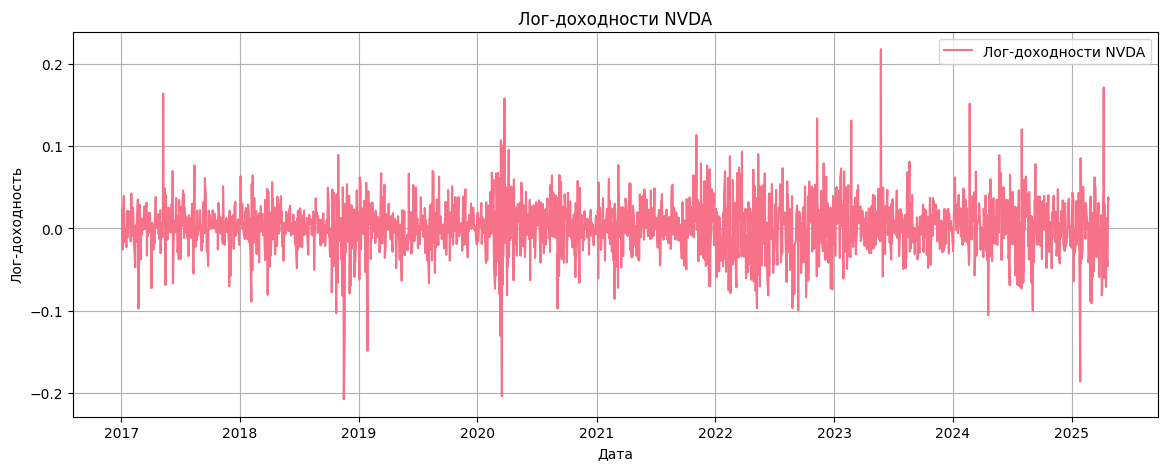

In [108]:
# Лог-доходности
log_ret = np.log(data / data.shift(1)).dropna()

# Графики лог-доходностей
for t in tickers:
    plt.figure(figsize=(14, 5))
    plt.plot(log_ret.index, log_ret[t], label=f'Лог-доходности {t}')
    plt.title(f'Лог-доходности {t}')
    plt.xlabel('Дата')
    plt.ylabel('Лог-доходность')
    plt.legend()
    plt.grid(True)
    plt.show()


In [110]:
# Функция для тестов
def stationarity_tests(series, name):
    adf_p = adfuller(series)[1]
    kpss_p = kpss(series, nlags="auto")[1]
    print(f"{name}: ADF p-value = {adf_p:.4f}, KPSS p-value = {kpss_p:.4f}")

# Применяем тесты к каждой акции
for t in tickers:
    stationarity_tests(log_ret[t], t)


MSFT: ADF p-value = 0.0000, KPSS p-value = 0.1000
NVDA: ADF p-value = 0.0000, KPSS p-value = 0.1000


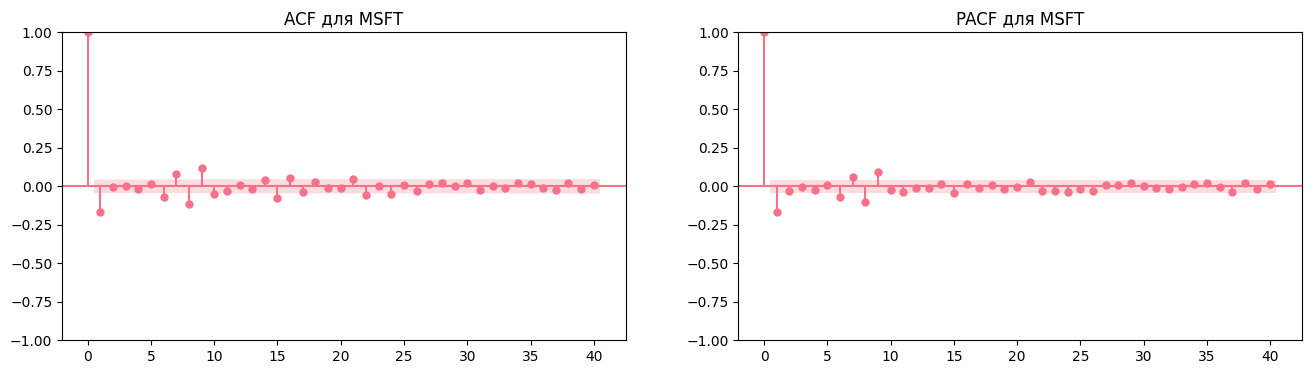

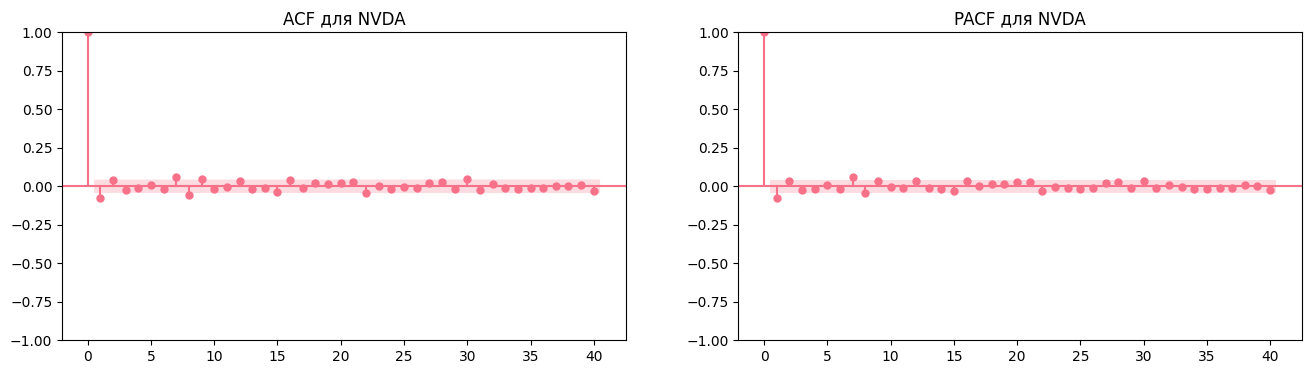

In [112]:
# ACF и PACF для каждой акции
for t in tickers:
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(log_ret[t], ax=axes[0], lags=40)
    plot_pacf(log_ret[t], ax=axes[1], lags=40, method='ywm')
    axes[0].set_title(f'ACF для {t}')
    axes[1].set_title(f'PACF для {t}')
    plt.show()



Автоматический подбор модели ARIMA для MSFT...
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2088
Model:               SARIMAX(0, 0, 1)   Log Likelihood                5518.414
Date:                Tue, 29 Apr 2025   AIC                         -11030.828
Time:                        00:13:41   BIC                         -11013.896
Sample:                             0   HQIC                        -11024.625
                               - 2088                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      2.854      0.004       0.000       0.002
ma.L1         -0.1724      0.013    -13.411      0.000      -0.198      -0.147
sigm

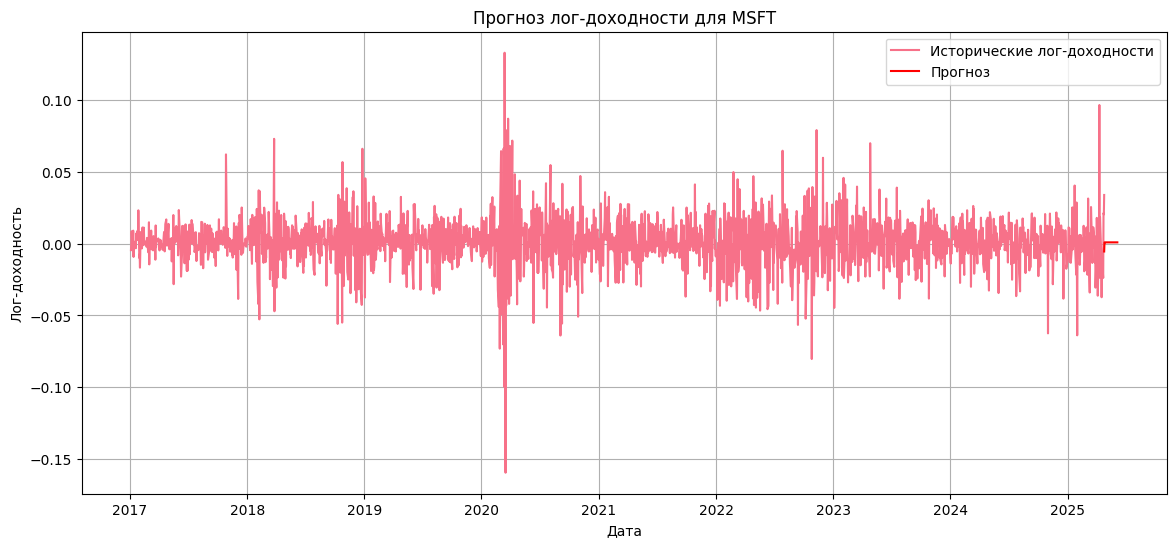


Автоматический подбор модели ARIMA для NVDA...
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2088
Model:               SARIMAX(1, 0, 1)   Log Likelihood                4213.363
Date:                Tue, 29 Apr 2025   AIC                          -8418.726
Time:                        00:13:48   BIC                          -8396.151
Sample:                             0   HQIC                         -8410.455
                               - 2088                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0026      0.001      2.351      0.019       0.000       0.005
ar.L1         -0.4342      0.179     -2.428      0.015      -0.785      -0.084
ma.L

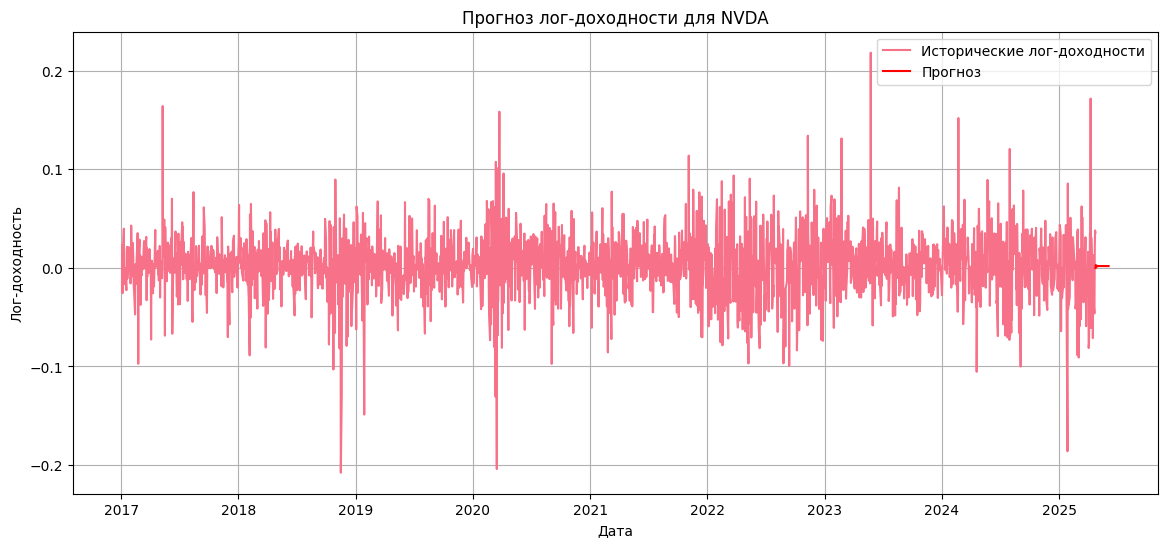

In [114]:
# Построение ARIMA для каждой акции
for t in tickers:
    print(f"\nАвтоматический подбор модели ARIMA для {t}...")

    # Автоматический подбор модели
    model = pm.auto_arima(
        log_ret[t],
        seasonal=False,
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore'
    )
    
    print(model.summary())
    
    # Обучение ARIMA
    arima_model = ARIMA(log_ret[t], order=model.order)
    arima_result = arima_model.fit()

    # Прогноз на 30 дней
    forecast = arima_result.forecast(steps=30)
    
    # График прогноза
    plt.figure(figsize=(14, 6))
    plt.plot(log_ret[t], label='Исторические лог-доходности')
    plt.plot(pd.date_range(log_ret.index[-1], periods=30, freq='B'), forecast, label='Прогноз', color='red')
    plt.title(f'Прогноз лог-доходности для {t}')
    plt.xlabel('Дата')
    plt.ylabel('Лог-доходность')
    plt.legend()
    plt.grid(True)
    plt.show()


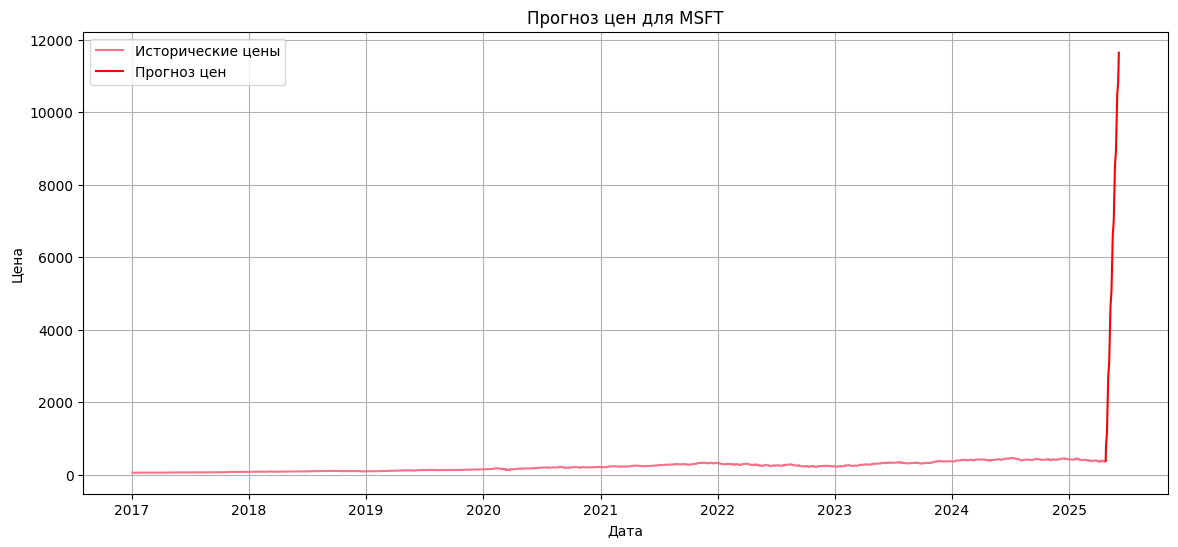

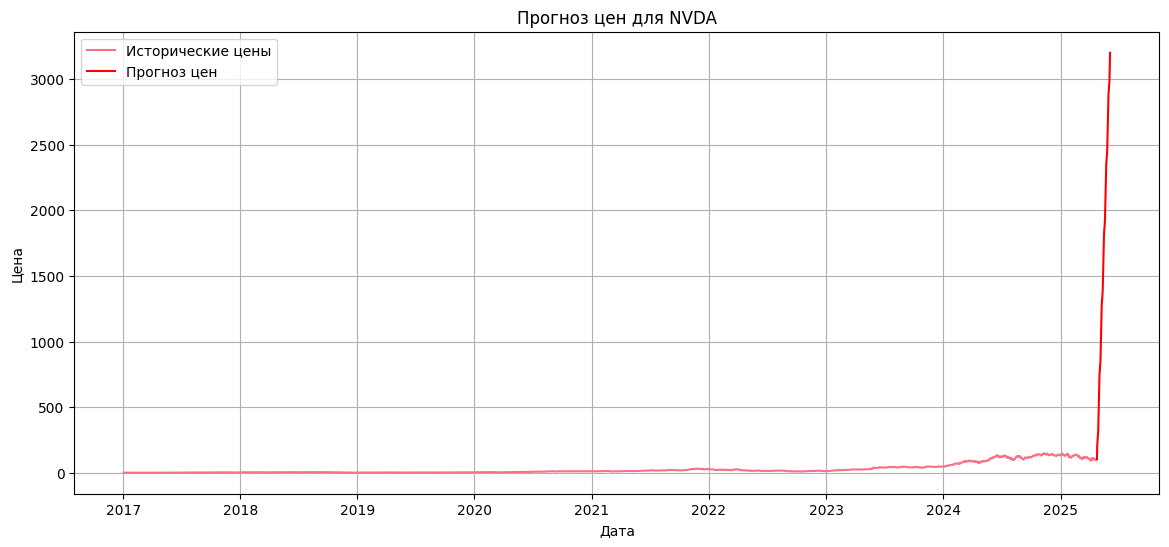

In [116]:
# Восстановление прогноза цен из лог-доходностей
def forecast_prices(last_price, log_returns_forecast):
    return last_price * np.exp(log_returns_forecast).cumsum()

# Построение прогнозов цен для каждой акции
for t in tickers:
    # Прогноз лог-доходностей
    forecast_log_ret = arima_result.forecast(steps=30)
    
    # Восстановление цен
    last_price = data[t].iloc[-1]
    forecast_prices_t = forecast_prices(last_price, forecast_log_ret)
    
    # График цен
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data[t], label='Исторические цены')
    plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast_prices_t, label='Прогноз цен', color='red')
    plt.title(f'Прогноз цен для {t}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%***********************]  2 of 2 completed

Пример данных:
Ticker           AAPL       MSFT
Date                            
2017-01-03  26.862429  56.601116
2017-01-04  26.832361  56.347878
2017-01-05  26.968813  56.347878

Основные статистики:
                   AAPL        MSFT
Mean          94.593840  180.814531
Median        77.824463  176.141083
Std           52.114997   87.515120
Min           26.832361   56.347878
Max          194.757660  354.635498
Correlation    0.980802    0.980802


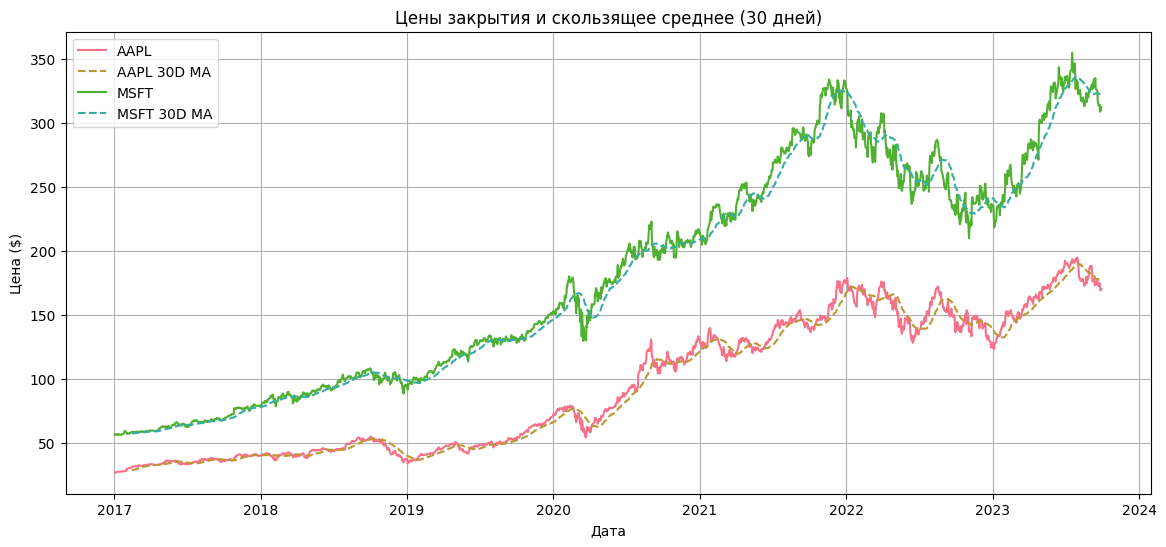


Результаты ADF-теста для исходных рядов:
                                                              AAPL  \
ADF Statistic                                            -0.666834   
p-value                                                   0.855154   
Critical Values  {'1%': -3.4342530582756807, '5%': -2.863263979...   

                                                              MSFT  
ADF Statistic                                            -0.670365  
p-value                                                   0.854277  
Critical Values  {'1%': -3.4342322039823197, '5%': -2.863254774...  

Результаты ADF-теста после преобразований:
                                                              AAPL  \
ADF Statistic                                           -12.863862   
p-value                                                        0.0   
Critical Values  {'1%': -3.4342322039823197, '5%': -2.863254774...   

                                                              MSFT  
ADF Sta

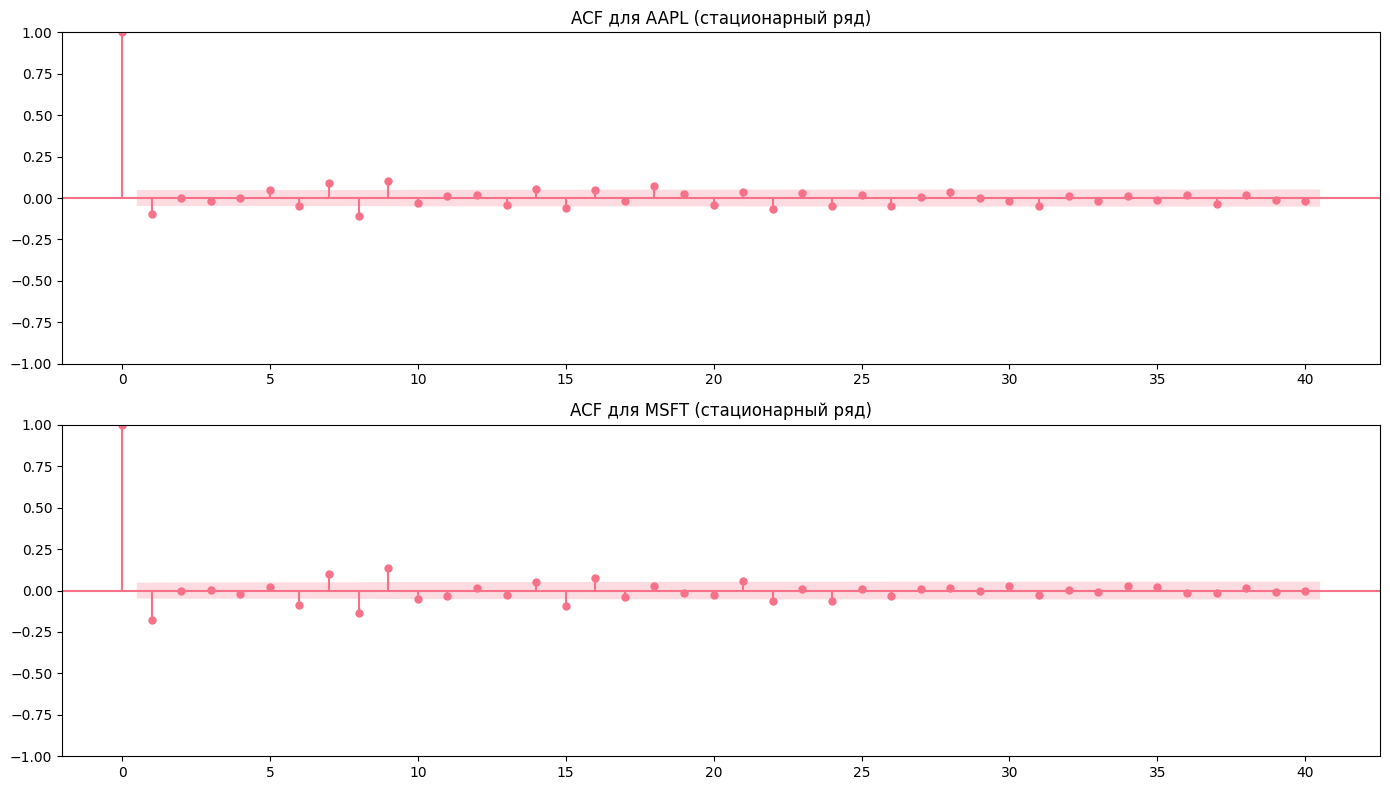

In [120]:
# Импорт необходимых библиотек
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализаций
%matplotlib inline
#plt.style.use('seaborn')

# Шаг 1: Загрузка данных
tickers = ['AAPL', 'MSFT']
start_date = '2017-01-01'
end_date = '2023-09-30'

data = yf.download(tickers, start=start_date, end=end_date)['Close']
data = data.dropna()  # Удаление пропусков

print("Пример данных:")
print(data.head(3))

# Шаг 2: Основные статистики
stats = pd.DataFrame({
    'AAPL': [
        data['AAPL'].mean(),
        data['AAPL'].median(),
        data['AAPL'].std(),
        data['AAPL'].min(),
        data['AAPL'].max(),
        data.corr().loc['AAPL', 'MSFT']
    ],
    'MSFT': [
        data['MSFT'].mean(),
        data['MSFT'].median(),
        data['MSFT'].std(),
        data['MSFT'].min(),
        data['MSFT'].max(),
        data.corr().loc['MSFT', 'AAPL']
    ]
}, index=['Mean', 'Median', 'Std', 'Min', 'Max', 'Correlation'])

print("\nОсновные статистики:")
print(stats)

# Шаг 3: Визуализация исходных рядов
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
    plt.plot(data[ticker].rolling(30).mean(), label=f'{ticker} 30D MA', linestyle='--')
    
plt.title('Цены закрытия и скользящее среднее (30 дней)')
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 4: Проверка на стационарность (ADF-тест)
def adf_test(series):
    result = adfuller(series)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

adf_results = pd.DataFrame({
    'AAPL': adf_test(data['AAPL']),
    'MSFT': adf_test(data['MSFT'])
})

print("\nРезультаты ADF-теста для исходных рядов:")
print(adf_results)

# Шаг 5: Преобразование рядов
def make_stationary(series):
    log_series = np.log(series)
    diff_log = log_series.diff(1).dropna()
    return diff_log

data_stationary = pd.DataFrame({
    'AAPL': make_stationary(data['AAPL']),
    'MSFT': make_stationary(data['MSFT'])
})

# Проверка стационарности после преобразований
adf_stationary = pd.DataFrame({
    'AAPL': adf_test(data_stationary['AAPL']),
    'MSFT': adf_test(data_stationary['MSFT'])
})

print("\nРезультаты ADF-теста после преобразований:")
print(adf_stationary)

# Шаг 6: Визуализация ACF для стационарных рядов
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plot_acf(data_stationary[ticker], lags=40, ax=axes[i], title=f'ACF для {ticker} (стационарный ряд)')
plt.tight_layout()
plt.show()

[*********************100%***********************]  2 of 2 completed


Дескриптивная статистика цен закрытия
              mean        std        min        25%         50%         75%  \
Ticker                                                                        
AAPL     94.593840  52.114997  26.832361  43.688652   77.824463  144.181656   
MSFT    180.814531  87.515120  56.347878  99.004745  176.141083  254.535004   

               max  Skewness  Kurtosis  
Ticker                                  
AAPL    194.757660  0.238232 -1.539732  
MSFT    354.635498  0.160750 -1.368026  


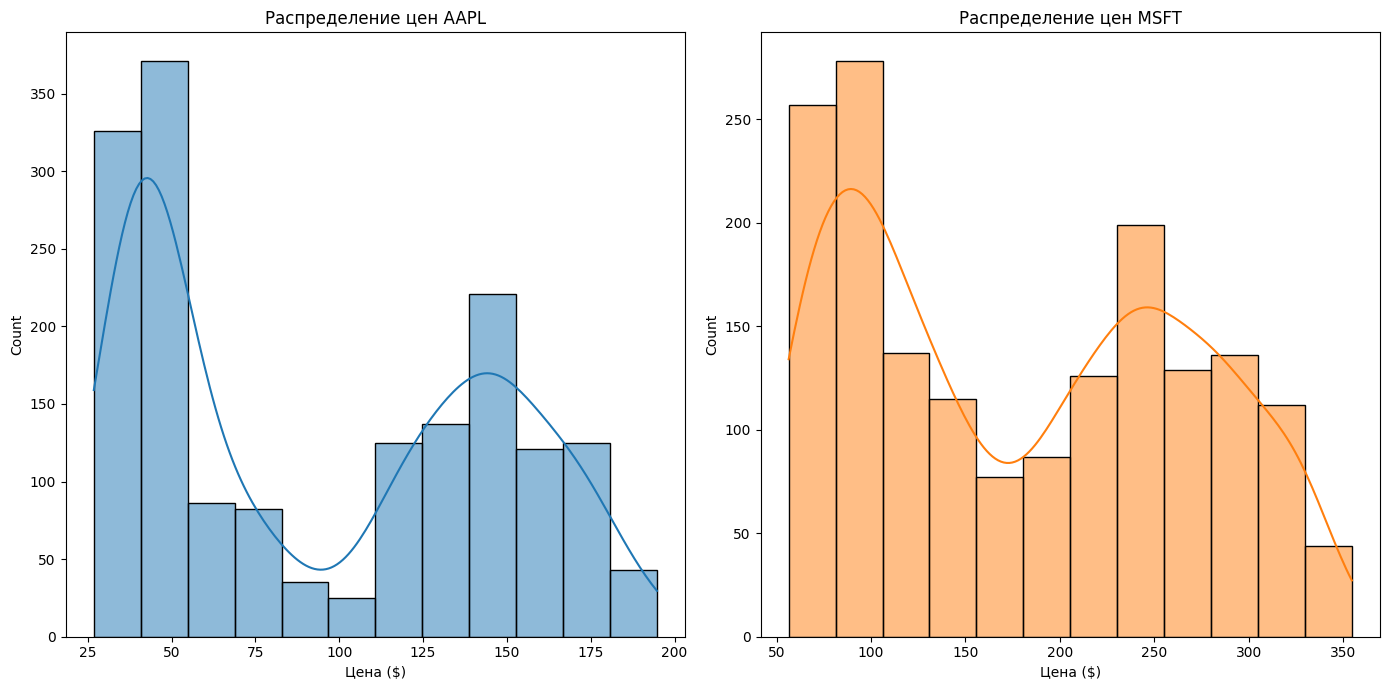


Анализ логарифмических доходностей
            mean       std       min       max  Skewness  Kurtosis  \
Ticker                                                               
AAPL    0.001088  0.019210 -0.137708  0.113158 -0.236710  5.497859   
MSFT    0.001007  0.018078 -0.159453  0.132929 -0.220711  7.755590   

        Shapiro-Wilk p-value  
Ticker                        
AAPL            7.663026e-26  
MSFT            1.508018e-27  


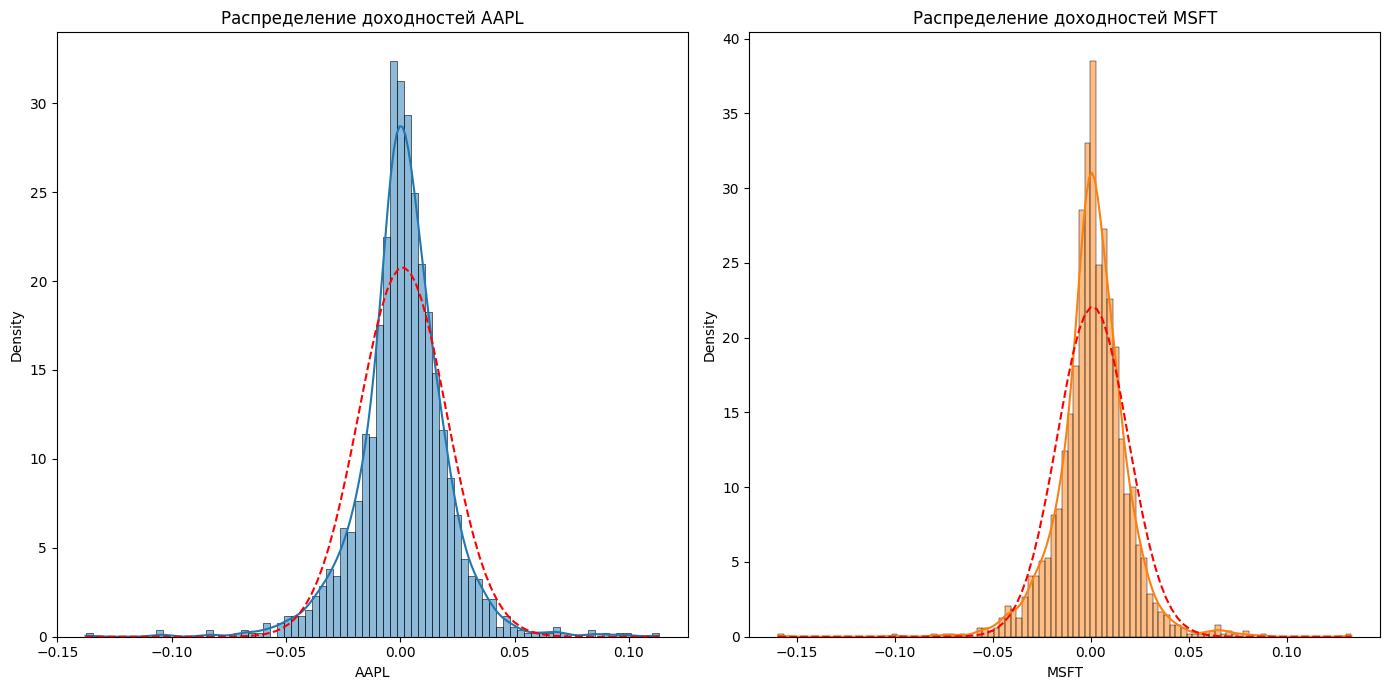


Результаты тестов на стационарность
            AAPL Price  MSFT Price  AAPL Returns  MSFT Returns
ADF Stat     -0.666834   -0.670365 -1.286386e+01 -1.392983e+01
ADF p-val     0.855154    0.854277  5.043445e-24  5.113546e-26
KPSS Stat     6.058216    6.021144  1.097917e-01  1.425897e-01
KPSS p-val    0.010000    0.010000  1.000000e-01  1.000000e-01


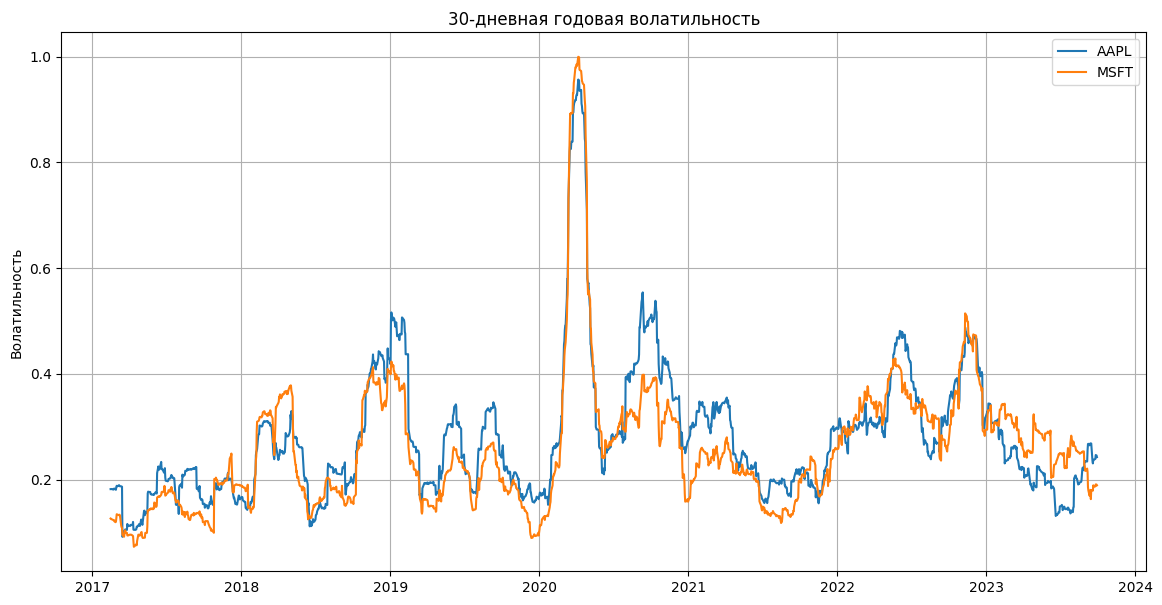


Тест ARCH на эффект кластеризации волатильности
AAPL ARCH p-value: 0.0000
MSFT ARCH p-value: 0.0000


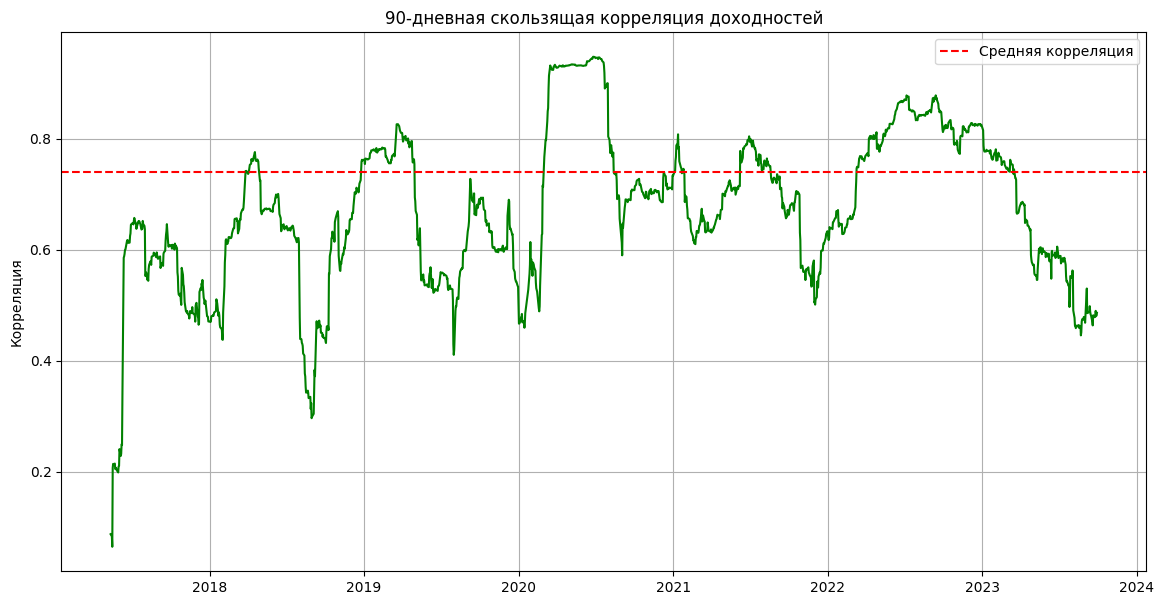

<Figure size 1400x700 with 0 Axes>

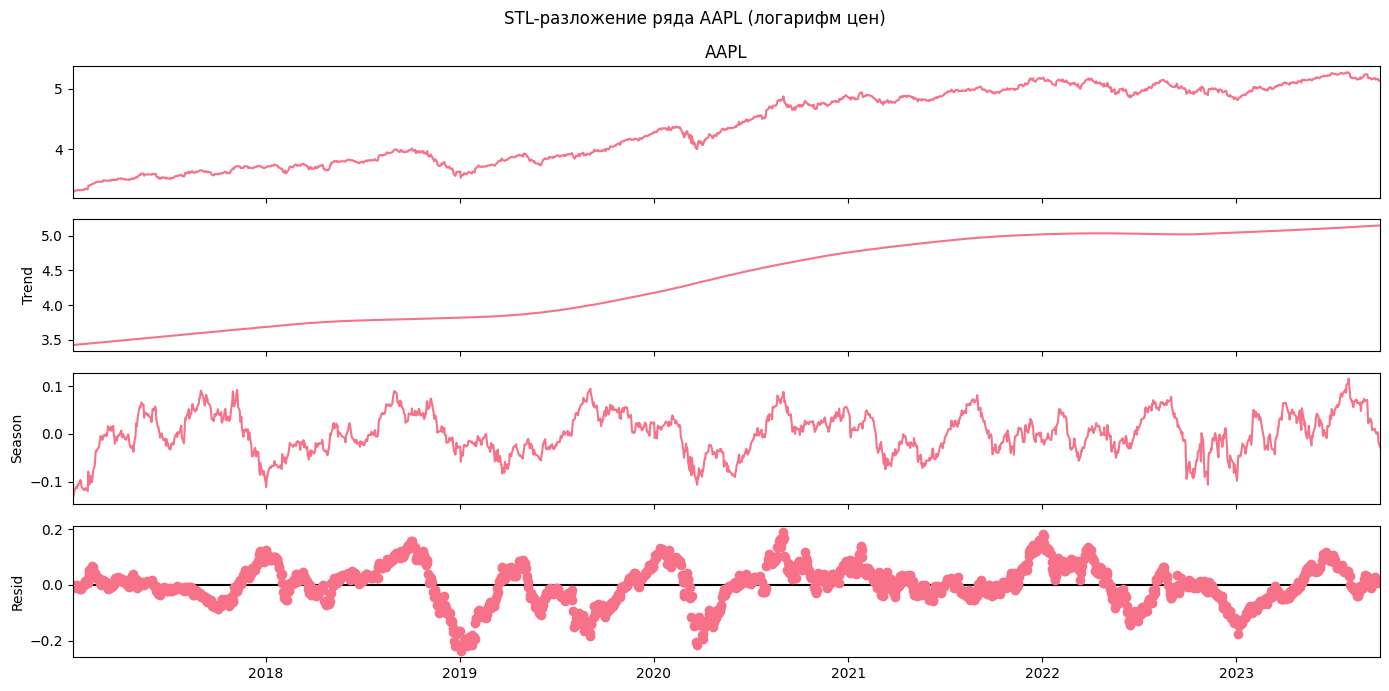

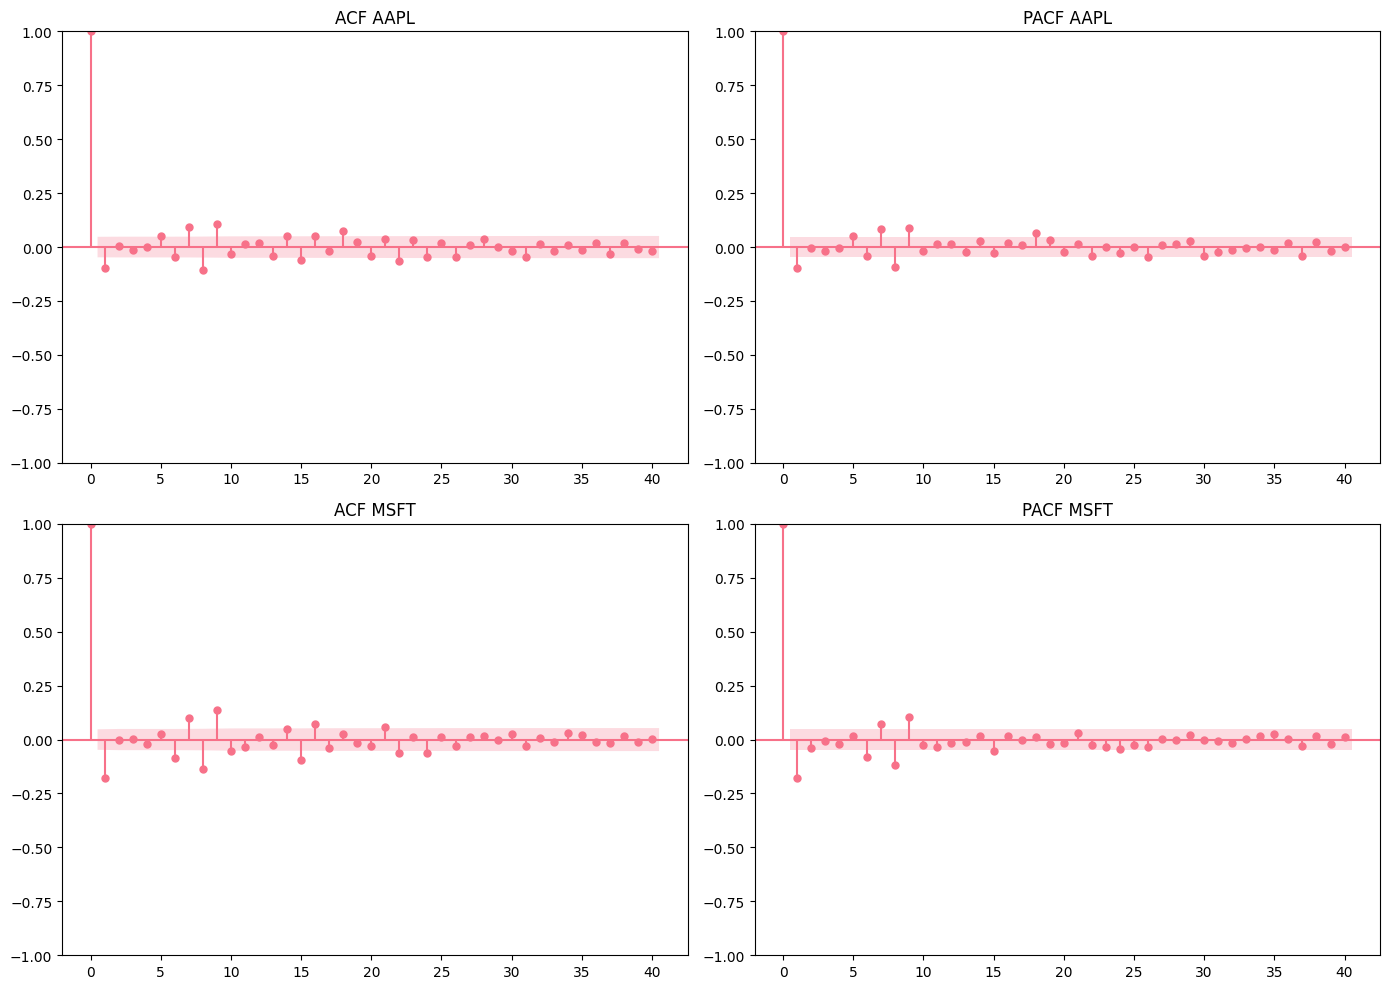

In [128]:
# Импорт библиотек
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from scipy.stats import shapiro, norm
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
#plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (14, 7)
colors = ['#1f77b4', '#ff7f0e']

# Загрузка данных
tickers = ['AAPL', 'MSFT']
data = yf.download(tickers, start='2017-01-01', end='2023-09-30')['Close'].dropna()

# 1. Описательная статистика
print("="*50)
print("Дескриптивная статистика цен закрытия")
print("="*50)
desc_stats = data.describe().T
desc_stats['Skewness'] = [data[t].skew() for t in tickers]
desc_stats['Kurtosis'] = [data[t].kurtosis() for t in tickers]
print(desc_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Skewness', 'Kurtosis']])

# 2. Визуализация распределения цен
fig, ax = plt.subplots(1, 2)
for i, ticker in enumerate(tickers):
    sns.histplot(data[ticker], ax=ax[i], kde=True, color=colors[i])
    ax[i].set_title(f'Распределение цен {ticker}')
    ax[i].set_xlabel('Цена ($)')
plt.tight_layout()
plt.show()

# 3. Анализ доходностей
returns = np.log(data).diff().dropna()

# 3.1 Статистики доходностей
print("\n" + "="*50)
print("Анализ логарифмических доходностей")
print("="*50)
return_stats = returns.describe().T
return_stats['Skewness'] = [returns[t].skew() for t in tickers]
return_stats['Kurtosis'] = [returns[t].kurtosis() for t in tickers]
return_stats['Shapiro-Wilk p-value'] = [shapiro(returns[t])[1] for t in tickers]
print(return_stats[['mean', 'std', 'min', 'max', 'Skewness', 'Kurtosis', 'Shapiro-Wilk p-value']])

# 3.2 Распределение доходностей
fig, ax = plt.subplots(1, 2)
for i, ticker in enumerate(tickers):
    sns.histplot(returns[ticker], ax=ax[i], kde=True, stat='density', color=colors[i])
    x = np.linspace(returns[ticker].min(), returns[ticker].max(), 100)
    ax[i].plot(x, norm.pdf(x, returns[ticker].mean(), returns[ticker].std()), 'r--')
    ax[i].set_title(f'Распределение доходностей {ticker}')
plt.tight_layout()
plt.show()

# 4. Тесты на стационарность
def test_stationarity(series):
    # ADF тест
    adf = adfuller(series)
    # KPSS тест
    kpss_test = kpss(series, regression='c')
    return {
        'ADF Stat': adf[0],
        'ADF p-val': adf[1],
        'KPSS Stat': kpss_test[0],
        'KPSS p-val': kpss_test[1]
    }

stationarity = pd.DataFrame({
    'AAPL Price': test_stationarity(data['AAPL']),
    'MSFT Price': test_stationarity(data['MSFT']),
    'AAPL Returns': test_stationarity(returns['AAPL']),
    'MSFT Returns': test_stationarity(returns['MSFT'])
})

print("\n" + "="*50)
print("Результаты тестов на стационарность")
print("="*50)
print(stationarity)

# 5. Анализ волатильности
volatility = returns.rolling(30).std() * np.sqrt(252)

plt.figure()
for i, ticker in enumerate(tickers):
    plt.plot(volatility[ticker], label=ticker, color=colors[i])
plt.title('30-дневная годовая волатильность')
plt.ylabel('Волатильность')
plt.legend()
plt.grid(True)
plt.show()

# 6. Тест ARCH на гетероскедастичность
def arch_test(series):
    model = arch_model(series, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    return res.pvalues[-1]

print("\n" + "="*50)
print("Тест ARCH на эффект кластеризации волатильности")
print("="*50)
print(f"AAPL ARCH p-value: {arch_test(returns['AAPL']):.4f}")
print(f"MSFT ARCH p-value: {arch_test(returns['MSFT']):.4f}")

# 7. Корреляционный анализ
rolling_corr = returns['AAPL'].rolling(90).corr(returns['MSFT'])

plt.figure()
plt.plot(rolling_corr, color='green')
plt.title('90-дневная скользящая корреляция доходностей')
plt.ylabel('Корреляция')
plt.axhline(y=returns.corr().iloc[0,1], color='r', linestyle='--', label='Средняя корреляция')
plt.legend()
plt.grid(True)
plt.show()

# 8. Разложение временного ряда (STL)
stl = STL(np.log(data['AAPL']), period=252)
res = stl.fit()

plt.figure()
res.plot()
plt.suptitle('STL-разложение ряда AAPL (логарифм цен)')
plt.tight_layout()
plt.show()

# 9. ACF/PACF для стационарных рядов
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
for i, ticker in enumerate(tickers):
    plot_acf(returns[ticker], lags=40, ax=ax[i,0], title=f'ACF {ticker}')
    plot_pacf(returns[ticker], lags=40, ax=ax[i,1], title=f'PACF {ticker}')
plt.tight_layout()
plt.show()